# Dataanalyse af unge som dropper ud af deres uddannelse

Denne analyse trækker data fra Dansk Statistik https://www.statistikbanken.dk/GENMF10 
API: https://api.statbank.dk/v1/data/GENMF10/JSONSTAT
Hjælp til API findes her: https://www.dst.dk/da/Statistik/hjaelp-til-statistikbanken/api

Data trækkes fra gruppen af unge som påbegyndte en ungdomsuddannelse 2017 og 5 år frem. I løbet af denne periode afdækker data'en hvor mange fra denne gruppe som er droppet ud. 

## Test af API'en

In [1]:
import requests

# Henter JSON-data fra GENMF10-tabellen
url = "https://api.statbank.dk/v1/tableinfo/GENMF10/JSONSTAT"
response = requests.get(url)
if response.status_code == 200:
    metadata = response.json()
    for variable in metadata['variables']:
        print(f"Variabel: {variable['id']}")
        for value in variable['values']:
            print(f"  Værdi: {value['id']} - {value['text']}")
else:
    print("Fejl ved hentning af metadata")

Variabel: STARTUD
  Værdi: TOT - I alt
  Værdi: H21 - H21 Gymnasiale uddannelser
  Værdi: H2120 - H2120 Gymnasiale uddannelser
  Værdi: H212010 - H212010 Alment gymnasiale uddannelser
  Værdi: H212020 - H212020 Erhvervsrettede gymnasiale uddannelser
  Værdi: H212030 - H212030 Internationale gymnasiale uddannelser
  Værdi: H2135 - H2135 Adgangsgivende uddannelsesforløb
  Værdi: H213510 - H213510 Adgangskurser - videregående udd.
  Værdi: H213520 - H213520 Adgangseksamen - ingeniøruddannelse
  Værdi: H213530 - H213530 Adgangsgivende værkstedsskoleforløb
  Værdi: H31 - H31 Erhvervsfaglige uddannelser
  Værdi: H3129 - H3129 Erhvervsfaglige grundforløb
  Værdi: H312910 - H312910 Omsorg, sundhed og pædagogik (OSP), grundforløb
  Værdi: H312915 - H312915 Kontor, handel og forretningsservice (KHF), grundforløb
  Værdi: H312920 - H312920 Fødevarer, jordbrug og oplevelser (FJO), grundforløb
  Værdi: H312925 - H312925 Teknologi, byggeri og transport (TBT), grundforløb
  Værdi: H3130 - H3130 Erhve

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# Opdaterede uddannelsestyper
uddannelseskoder = [
    #"H2120",  # Gymnasiale uddannelser
    "H31",    # Erhvervsfaglige uddannelser
    "H40",    # Korte videregående uddannelser, KVU
    "H50",    # Mellemlange videregående uddannelser, MVU
    "H60",    # Bacheloruddannelser, BACH
    "H70"     # Lange videregående uddannelser, LVU
]

# API-anmodning for antal startede i 2022
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["TOT"]},  # "TOT" = I alt
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "Tid", "values": ["2022"]}
    ]
}

# Sender API-anmodning
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet korrekt")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']

uddannelser = [
    #"Gymnasiale uddannelser",
    "Erhvervsfaglige uddannelser",
    "Korte videregående uddannelser (KVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Bacheloruddannelser (BACH)",
    "Lange videregående uddannelser (LVU)"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelser": uddannelser,
    "Antal Startede": values
})



print(df)



/Users/aw/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Data er hentet korrekt
                                  Uddannelser  Antal Startede
0                 Erhvervsfaglige uddannelser           40992
1        Korte videregående uddannelser (KVU)           10949
2  Mellemlange videregående uddannelser (MVU)           26425
3                  Bacheloruddannelser (BACH)           20776
4        Lange videregående uddannelser (LVU)           25114


## Personer som startede på uddannelser i 2017

Data er hentet korrekt


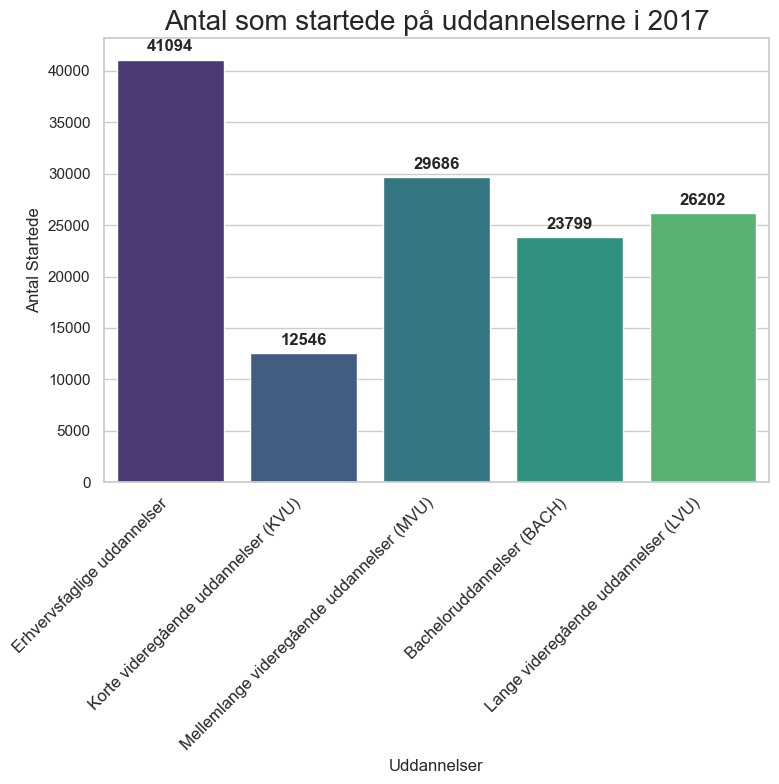

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# Opdaterede uddannelsestyper
uddannelseskoder = [
    #"H2120",  # Gymnasiale uddannelser
    "H31",    # Erhvervsfaglige uddannelser
    "H40",    # Korte videregående uddannelser, KVU
    "H50",    # Mellemlange videregående uddannelser, MVU
    "H60",    # Bacheloruddannelser, BACH
    "H70"     # Lange videregående uddannelser, LVU
]

# API-anmodning for antal startede i 2017
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["TOT"]},  # "TOT" = I alt
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# Sender API-anmodning
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet korrekt")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']

uddannelser = [
    #"Gymnasiale uddannelser",
    "Erhvervsfaglige uddannelser",
    "Korte videregående uddannelser (KVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Bacheloruddannelser (BACH)",
    "Lange videregående uddannelser (LVU)"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelser": uddannelser,
    "Antal Startede": values
})

# Brug "rocket" farvepaletten
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.set_palette("viridis")
plt.gcf().patch.set_facecolor('white')
ax = sns.barplot(data=df, x='Uddannelser', y='Antal Startede', edgecolor='white', linewidth=1)

# Sæt baggrundsfarven på aksen og gitteret
ax.set_facecolor('white')

# Ændre skrifttypen og størrelsen
plt.rcParams['font.family'] = 'Arial'
plt.ylabel('Antal Startede', fontsize=12)
plt.title('Antal som startede på uddannelserne i 2017', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Tilføj værdier på toppen af søjlerne
for index, row in df.iterrows():
    plt.text(index, row['Antal Startede'] + 500,
             f'{int(row["Antal Startede"])}', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



## Uddannelsesfrafaldet af denne gruppe indenfor 5 år

Data er hentet korrekt


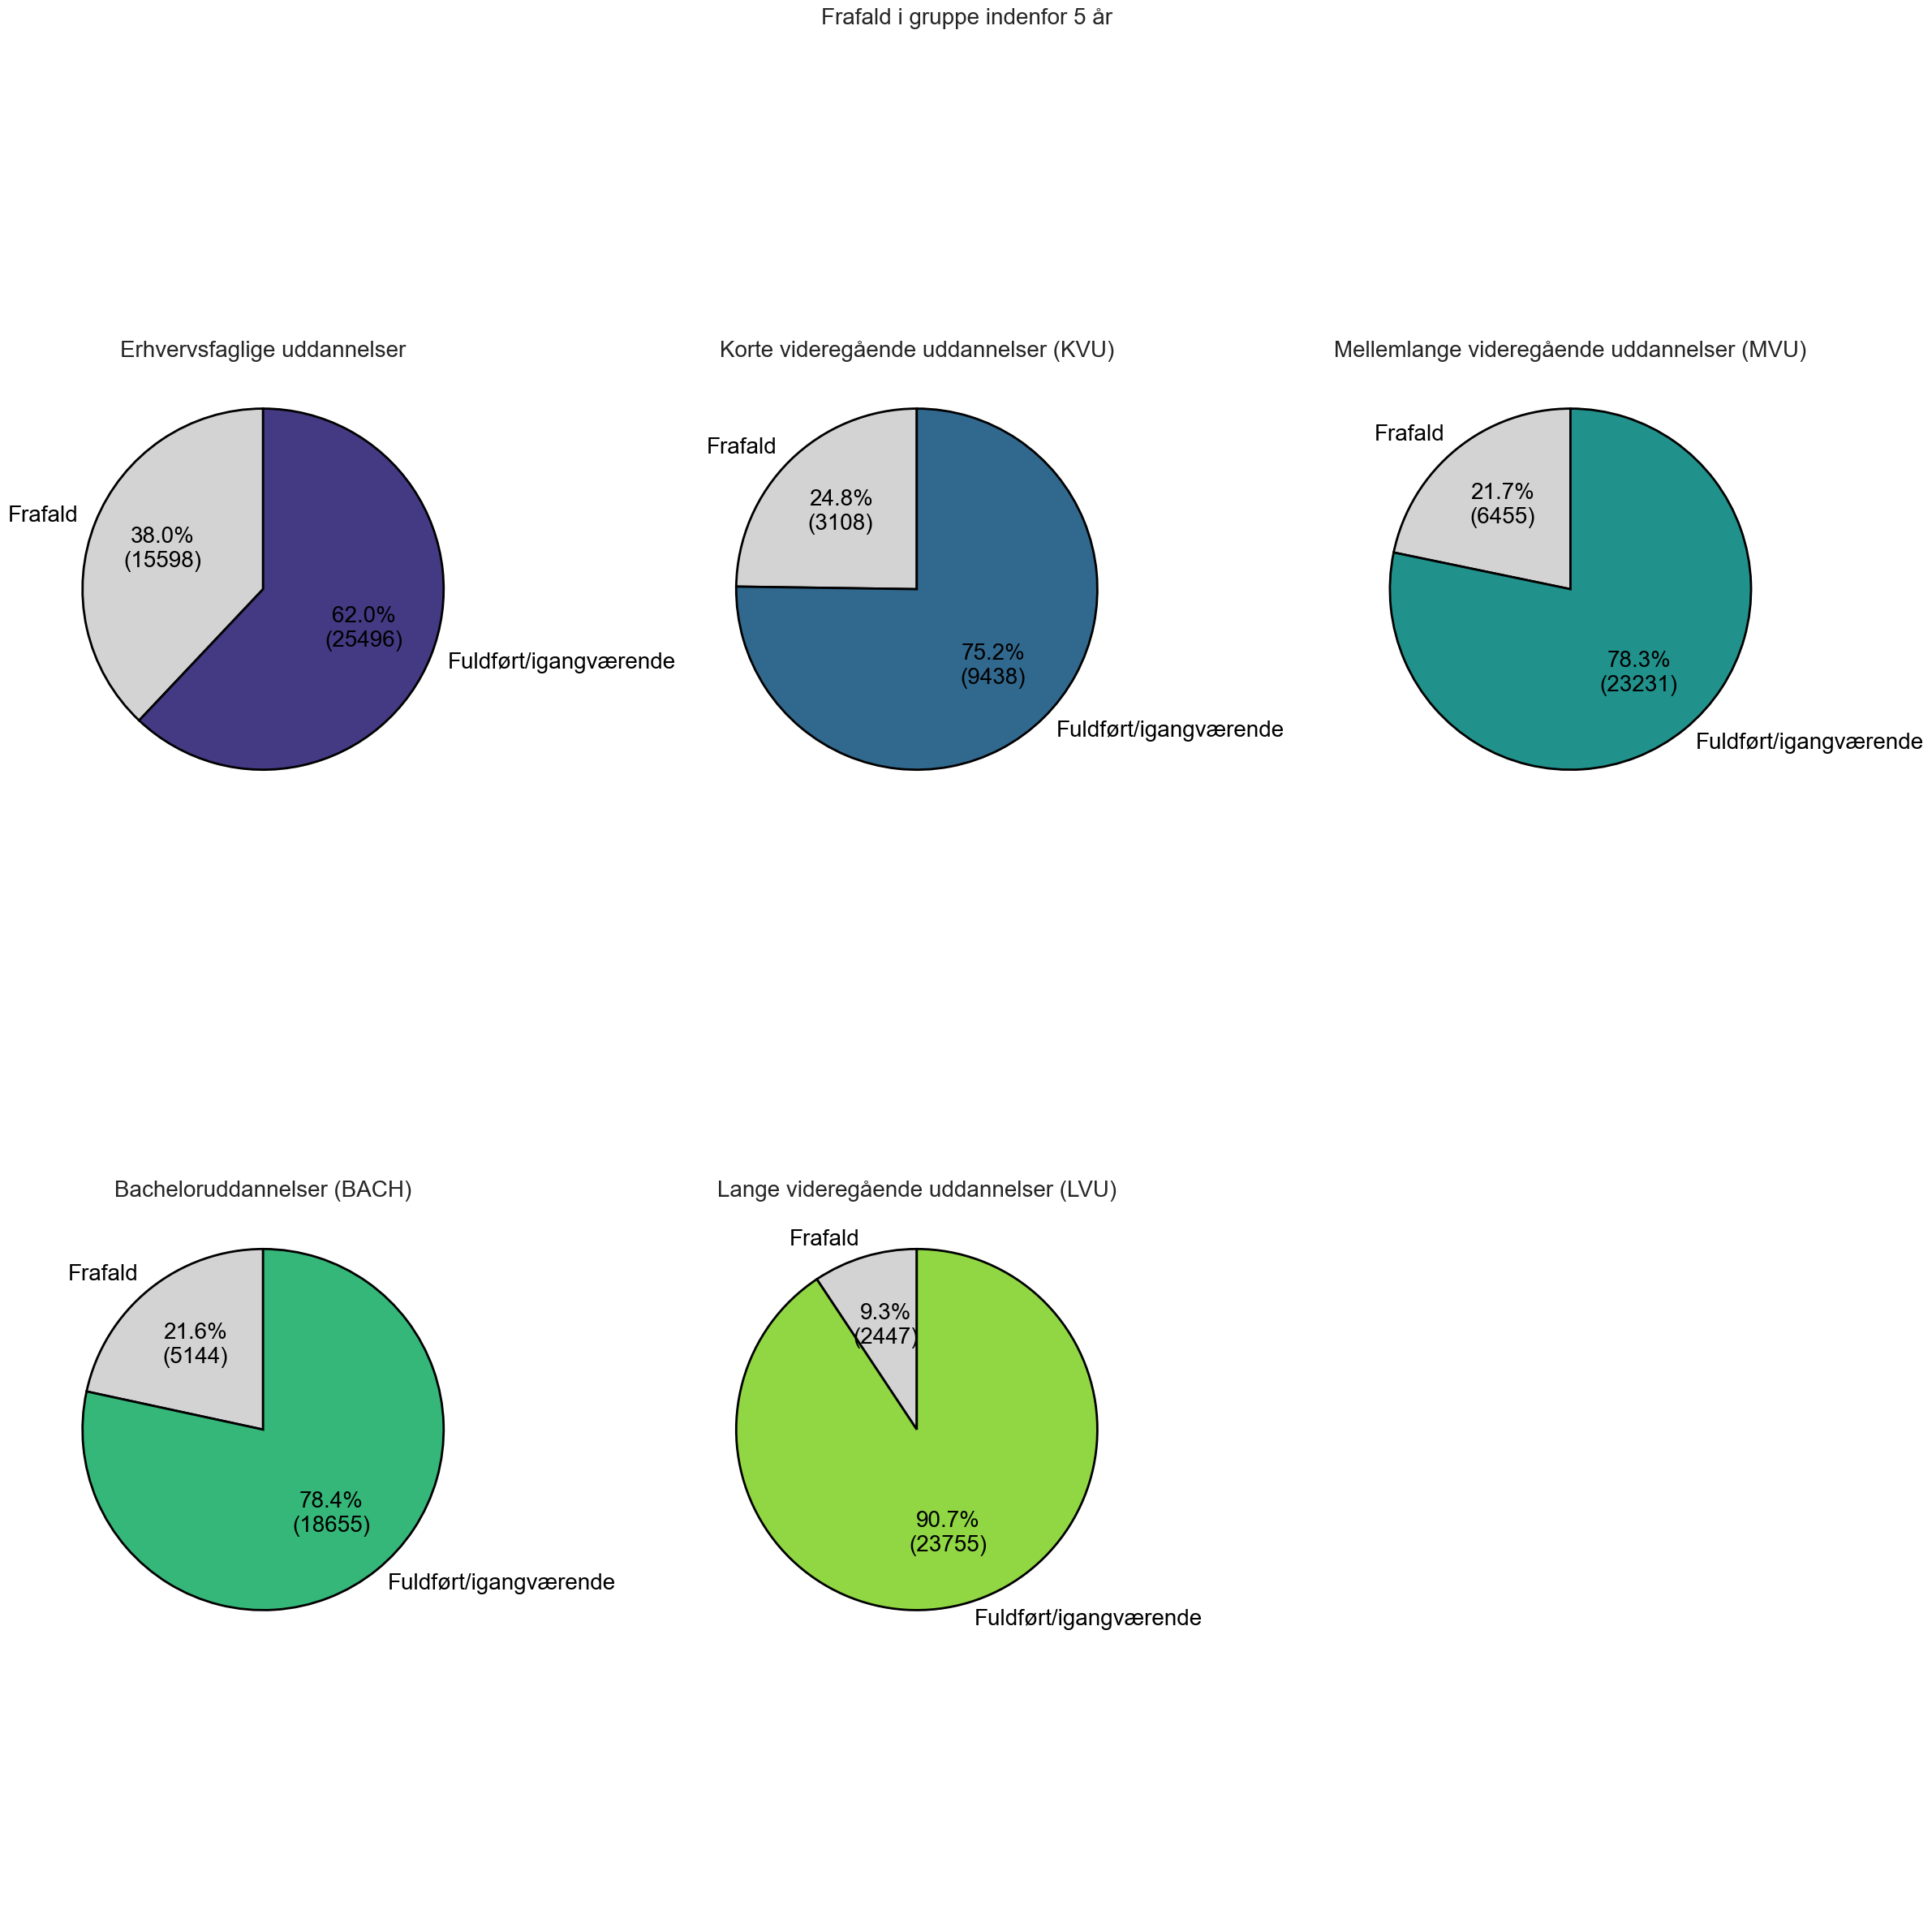

                                   Uddannelse  Startede  Frafald  Andet
0                 Erhvervsfaglige uddannelser     41094    15598  25496
1        Korte videregående uddannelser (KVU)     12546     3108   9438
2  Mellemlange videregående uddannelser (MVU)     29686     6455  23231
3                  Bacheloruddannelser (BACH)     23799     5144  18655
4        Lange videregående uddannelser (LVU)     26202     2447  23755


In [4]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# Opdaterede uddannelsestyper
uddannelseskoder = [
    "H31",    # Erhvervsfaglige uddannelser
    "H40",    # Korte videregående uddannelser, KVU
    "H50",    # Mellemlange videregående uddannelser, MVU
    "H60",    # Bacheloruddannelser, BACH
    "H70"     # Lange videregående uddannelser, LVU
]

# API-anmodning for frafald inden for første år i 2022
api_frafald = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "7" = Frafald inden for 5 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# API-anmodning for antal startede i 2017
api_startede = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["TOT"]},  # "TOT" = I alt
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# Henter data for frafald og startede
response_frafald = requests.post(url, json=api_frafald)
response_startede = requests.post(url, json=api_startede)

# Tjek om data blev hentet korrekt
if response_frafald.status_code == 200 and response_startede.status_code == 200:
    data_frafald = response_frafald.json()
    data_startede = response_startede.json()
    print("Data er hentet korrekt")
else:
    print(f"Fejl ved frafald: {response_frafald.status_code}")
    print(f"Fejl ved startede: {response_startede.status_code}")
    exit()

# Konverter data til DataFrame
values_frafald = data_frafald['dataset']['value']
values_startede = data_startede['dataset']['value']

uddannelser = [
    "Erhvervsfaglige uddannelser",
    "Korte videregående uddannelser (KVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Bacheloruddannelser (BACH)",
    "Lange videregående uddannelser (LVU)"
]

# Opret DataFrame med startede og frafald
df = pd.DataFrame({
    "Uddannelse": uddannelser,
    "Startede": values_startede,
    "Frafald": values_frafald
})

# Beregn resterende (fuldført eller stadig i gang)
df['Andet'] = df['Startede'] - df['Frafald']

# Farvekode baseret på 'viridis' paletten til uddannelser og grå til frafald
colors = sns.color_palette('viridis', len(df))
gray_color = '#D3D3D3'

# Visualiser data som større cirkeldiagrammer med Seaborn
fig, axes = plt.subplots(2, 3, figsize=(24, 24), facecolor='white')
plt.rcParams['font.family'] = 'Arial'

for i, ax in enumerate(axes.flatten()):
    if i < len(df):
        wedges, texts, autotexts = ax.pie(
            [df['Frafald'][i], df['Andet'][i]],
            labels=['Frafald', 'Fuldført/igangværende'],
            autopct=lambda p: f'{p:.1f}%\n({int(df["Frafald"][i])})' if p < 50 else f'{p:.1f}%\n({int(df["Andet"][i])})',
            startangle=90,
            colors=[gray_color, colors[i]],
            textprops={'fontsize': 20},
            wedgeprops={'edgecolor': 'black', 'linewidth': 2}
        )
        ax.set_title(df['Uddannelse'][i], fontsize=20)
        for text in texts + autotexts:
            text.set_color('black')
        ax.set_facecolor('white')
    else:
        ax.axis('off')

plt.suptitle('Frafald i gruppe indenfor 5 år', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print(df)


# Fordeling på køn

Data er hentet


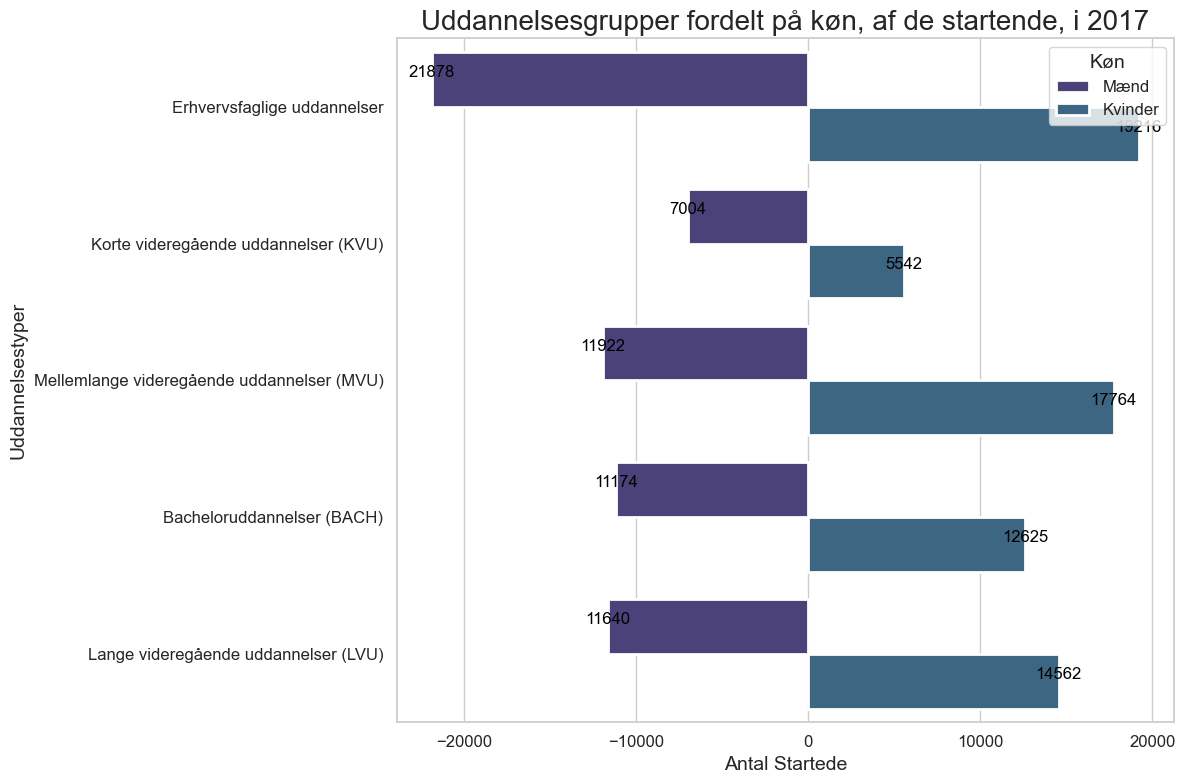

       Køn                                  Uddannelse  Startede
0     Mænd                 Erhvervsfaglige uddannelser    -21878
1  Kvinder                 Erhvervsfaglige uddannelser     19216
2     Mænd        Korte videregående uddannelser (KVU)     -7004
3  Kvinder        Korte videregående uddannelser (KVU)      5542
4     Mænd  Mellemlange videregående uddannelser (MVU)    -11922
5  Kvinder  Mellemlange videregående uddannelser (MVU)     17764
6     Mænd                  Bacheloruddannelser (BACH)    -11174
7  Kvinder                  Bacheloruddannelser (BACH)     12625
8     Mænd        Lange videregående uddannelser (LVU)    -11640
9  Kvinder        Lange videregående uddannelser (LVU)     14562


In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["TOT"]},  # "TOT" = I alt
        {"code": "KØN", "values": ["M", "K"]},  # Skift fra 10 til M og K
        {"code": "STARTUD", "values": ["H31", "H40", "H50", "H60", "H70"]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Sender API-anmodningen
response = requests.post(url, json=api)

# Kontrollerer om data blev hentet
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverterer data til DataFrame
values = data['dataset']['value']
køn = ["Mænd", "Kvinder"]
udannelser = [
    "Erhvervsfaglige uddannelser",
    "Korte videregående uddannelser (KVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Bacheloruddannelser (BACH)",
    "Lange videregående uddannelser (LVU)"
]

# Opret DataFrame med køn og uddannelser
df = pd.DataFrame({
    "Køn": køn * len(udannelser),
    "Uddannelse": [udd for udd in udannelser for _ in køn],
    "Startede": values
})

# Gør værdier for mænd negative for at lave en befolkningspyramide
df['Startede'] = df.apply(lambda x: -x['Startede'] if x['Køn'] == 'Mænd' else x['Startede'], axis=1)

# Brug 'viridis' farvepaletten
colors = sns.color_palette('viridis', len(df['Uddannelse'].unique()))

# Visualiser data som befolkningspyramide med Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.set_palette(colors)
plt.gcf().patch.set_facecolor('white')

# Opret befolkningspyramide
ax = sns.barplot(data=df, y='Uddannelse', x='Startede', hue='Køn', dodge=True, edgecolor='white', linewidth=2)

# Tilføj tal på toppen af hver søjle
for p in ax.patches:
    value = int(abs(p.get_width()))
    ax.annotate(f'{value}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ændre skrifttypen og størrelsen
plt.rcParams['font.family'] = 'Arial'
plt.xlabel('Antal Startede', fontsize=14)
plt.ylabel('Uddannelsestyper', fontsize=14)
plt.title('Uddannelsesgrupper fordelt på køn, af de startende, i 2017', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Køn', fontsize=12, title_fontsize=14, loc='upper right')

plt.tight_layout()
plt.show()

print(df)


Data hentet


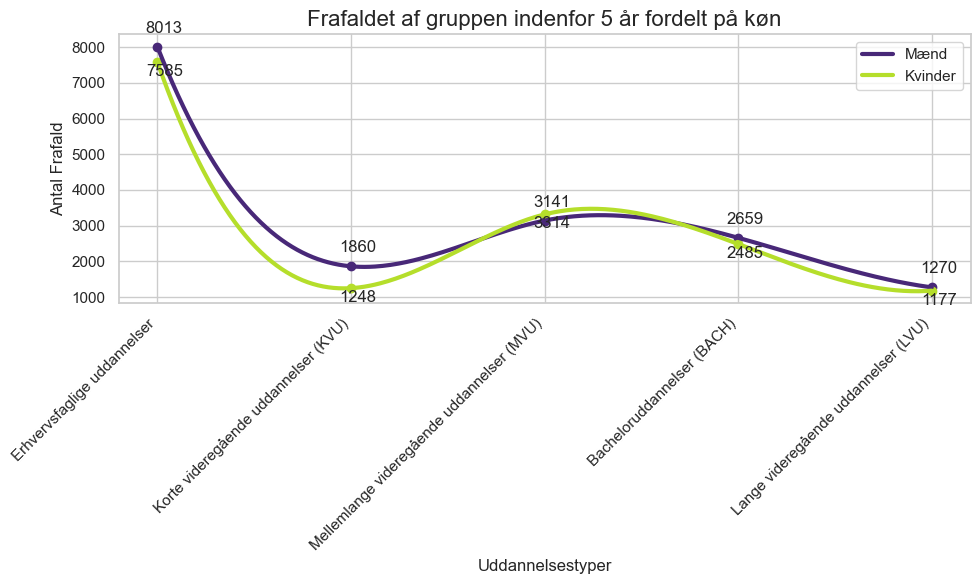

                                   Uddannelse      Køn  Frafald
0                 Erhvervsfaglige uddannelser     Mænd     8013
1                 Erhvervsfaglige uddannelser  Kvinder     7585
2        Korte videregående uddannelser (KVU)     Mænd     1860
3        Korte videregående uddannelser (KVU)  Kvinder     1248
4  Mellemlange videregående uddannelser (MVU)     Mænd     3141
5  Mellemlange videregående uddannelser (MVU)  Kvinder     3314
6                  Bacheloruddannelser (BACH)     Mænd     2659
7                  Bacheloruddannelser (BACH)  Kvinder     2485
8        Lange videregående uddannelser (LVU)     Mænd     1270
9        Lange videregående uddannelser (LVU)  Kvinder     1177


In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api_frafald = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "7" = Frafald i gruppen inden for 5 år
        {"code": "KØN", "values": ["M", "K"]},  # Mænd og kvinder
        {"code": "STARTUD", "values": ["H31", "H40", "H50", "H60", "H70"]},
        {"code": "Tid", "values": ["2017"]}  # Startår 2017 for at måle frafald efter 5 år
    ]
}

# Sender API-anmodningen
response = requests.post(url, json=api_frafald)

# Kontrollerer om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data hentet")
else:
    print(f"Fejl ved frafald: {response.status_code}")
    exit()

# Konverter data til DataFrame
values_frafald = data['dataset']['value']

køn = ['Mænd', 'Kvinder'] * 5
uddannelser = [
    "Erhvervsfaglige uddannelser",
    "Erhvervsfaglige uddannelser",
    "Korte videregående uddannelser (KVU)",
    "Korte videregående uddannelser (KVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Bacheloruddannelser (BACH)",
    "Bacheloruddannelser (BACH)",
    "Lange videregående uddannelser (LVU)",
    "Lange videregående uddannelser (LVU)"
]

# Opret DataFrame med køn og frafald
df = pd.DataFrame({
    "Uddannelse": uddannelser,
    "Køn": køn,
    "Frafald": values_frafald
})

# Visualiser data som kurvediagram med splines og viridis farvepalet med kontrast
plt.figure(figsize=(10, 6))
# Vælg farver fra viridis-palletten med maksimal kontrast
colors = [sns.color_palette('viridis', 8)[0], sns.color_palette('viridis', 8)[-1]]

for idx, gender in enumerate(['Mænd', 'Kvinder']):
    subset = df[df['Køn'] == gender]
    x = np.arange(len(subset['Uddannelse']))
    y = subset['Frafald']
    # Opret splines for glatte kurver
    x_new = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3) # ændrer på splines blødhed
    y_smooth = spl(x_new)
    plt.plot(x_new, y_smooth, label=gender, color=colors[idx], linewidth=3)
    plt.scatter(x, y, color=colors[idx])
    # Tilføj antal som labels ved hver datapunkt med justering for overlap
    for i, txt in enumerate(subset['Frafald']):
        plt.annotate(f'{txt}', (i, txt), textcoords="offset points", xytext=(5, 10 * (-1)**idx), ha='center')

plt.xlabel('Uddannelsestyper', fontsize=12)
plt.ylabel('Antal Frafald', fontsize=12)
plt.title('Frafaldet af gruppen indenfor 5 år fordelt på køn', fontsize=16)
plt.xticks(np.arange(len(uddannelser)//2), subset['Uddannelse'].unique(), rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(df)


# Fordeling på alder

Data er hentet


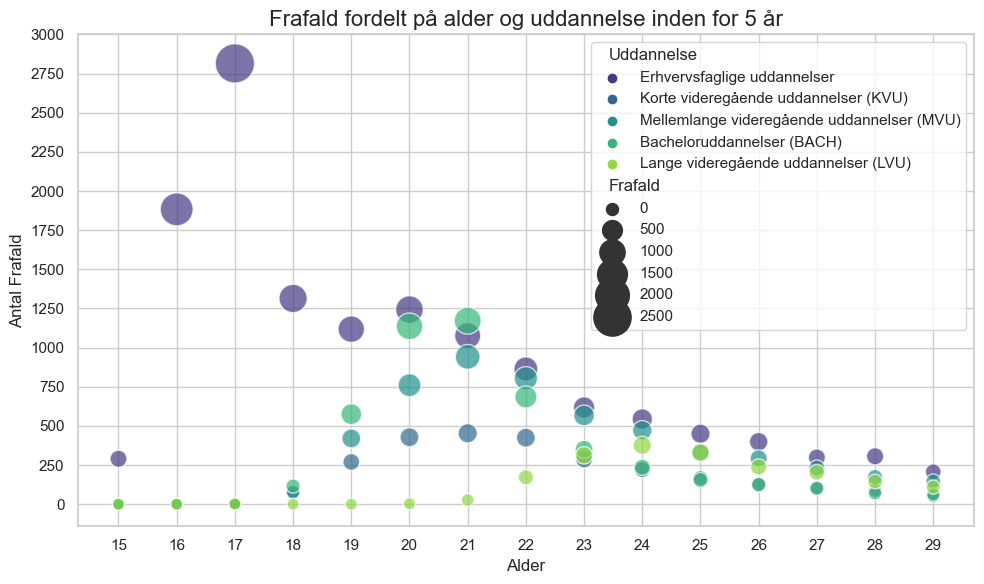

    Alder                            Uddannelse  Frafald
0      15           Erhvervsfaglige uddannelser      290
1      16           Erhvervsfaglige uddannelser     1883
2      17           Erhvervsfaglige uddannelser     2815
3      18           Erhvervsfaglige uddannelser     1314
4      19           Erhvervsfaglige uddannelser     1118
..    ...                                   ...      ...
70     25  Lange videregående uddannelser (LVU)      329
71     26  Lange videregående uddannelser (LVU)      238
72     27  Lange videregående uddannelser (LVU)      204
73     28  Lange videregående uddannelser (LVU)      145
74     29  Lange videregående uddannelser (LVU)      109

[75 rows x 3 columns]


In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "7" = Frafald i gruppen inden for 5 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": ["H31", "H40", "H50", "H60", "H70"]},
        {"code": "STARTALD", "values": ["15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Send API-anmodningen
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']
aldersgrupper = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
udannelser = [
    "Erhvervsfaglige uddannelser",
    "Korte videregående uddannelser (KVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Bacheloruddannelser (BACH)",
    "Lange videregående uddannelser (LVU)"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Alder": aldersgrupper * len(udannelser),
    "Uddannelse": [udd for udd in udannelser for _ in aldersgrupper],
    "Frafald": values
})

# Visualiser data som scatter plot med 'viridis' farvepaletten
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(data=df, x='Alder', y='Frafald', size='Frafald', hue='Uddannelse', 
                sizes=(75, 800), palette='viridis', alpha=0.7, edgecolor='w', linewidth=1)

plt.xlabel('Alder', fontsize=12)
plt.ylabel('Antal Frafald', fontsize=12)
plt.title('Frafald fordelt på alder og uddannelse inden for 5 år', fontsize=16)
plt.xticks(ticks=aldersgrupper)
plt.yticks(ticks=range(0, df['Frafald'].max() + 250, 250))
plt.tight_layout()
plt.show()

print(df)



Data er hentet


/Users/aw/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/aw/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aw/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/aw/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: 

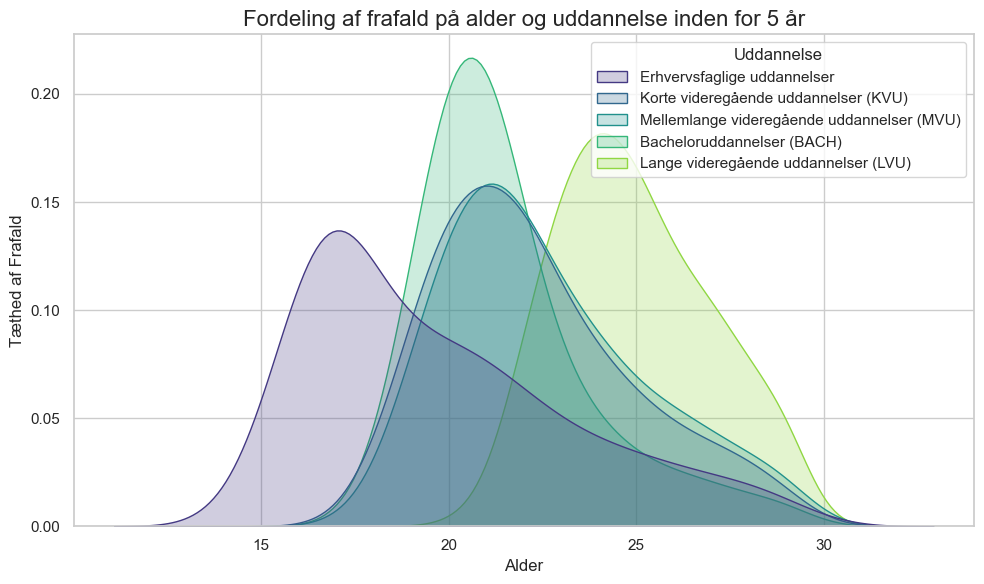

    Alder                            Uddannelse  Frafald
0      15           Erhvervsfaglige uddannelser      290
1      16           Erhvervsfaglige uddannelser     1883
2      17           Erhvervsfaglige uddannelser     2815
3      18           Erhvervsfaglige uddannelser     1314
4      19           Erhvervsfaglige uddannelser     1118
..    ...                                   ...      ...
70     25  Lange videregående uddannelser (LVU)      329
71     26  Lange videregående uddannelser (LVU)      238
72     27  Lange videregående uddannelser (LVU)      204
73     28  Lange videregående uddannelser (LVU)      145
74     29  Lange videregående uddannelser (LVU)      109

[75 rows x 3 columns]


In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "7" = Frafald i gruppen inden for 5 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": ["H31", "H40", "H50", "H60", "H70"]},
        {"code": "STARTALD", "values": ["15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29"]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Send API-anmodningen
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']
aldersgrupper = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
udannelser = [
    "Erhvervsfaglige uddannelser",
    "Korte videregående uddannelser (KVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Bacheloruddannelser (BACH)",
    "Lange videregående uddannelser (LVU)"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Alder": aldersgrupper * len(udannelser),
    "Uddannelse": [udd for udd in udannelser for _ in aldersgrupper],
    "Frafald": values
})

# Juster data for at undgå falske høje værdier
df['Frafald'] = df['Frafald'].apply(lambda x: x if x > 0 else 0)

# Visualiser data som KDE-plot med 'viridis' farvepaletten
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Alder', hue='Uddannelse', weights='Frafald', 
            common_norm=False, fill=True, palette='viridis', bw_adjust=0.5)

plt.xlabel('Alder', fontsize=12)
plt.ylabel('Tæthed af Frafald', fontsize=12)
plt.title('Fordeling af frafald på alder og uddannelse inden for 5 år', fontsize=16)
plt.tight_layout()
plt.show()

print(df)



Data er hentet


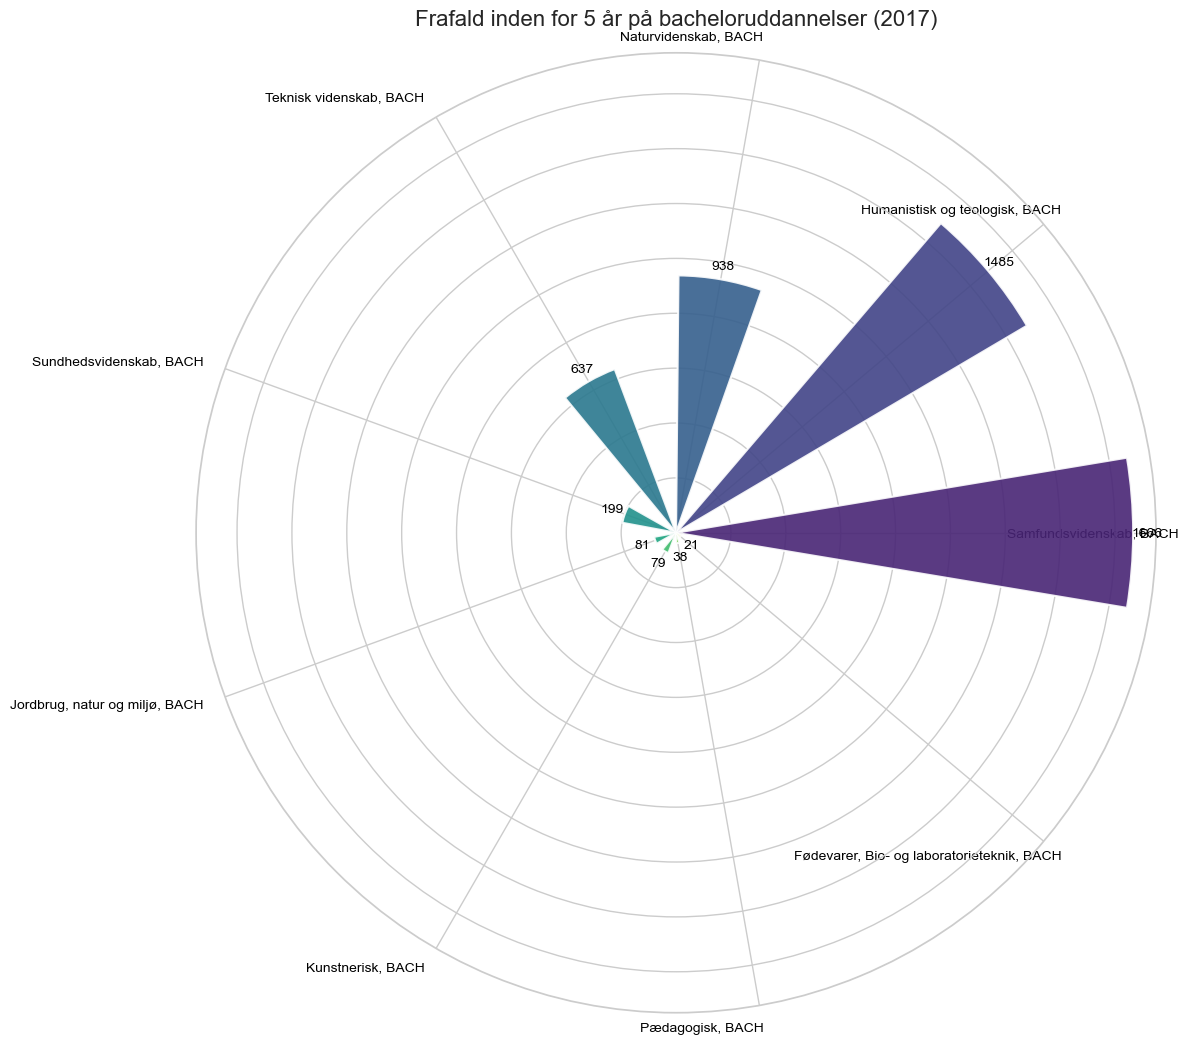

                                   Uddannelse  Frafald
4                     Samfundsvidenskab, BACH     1666
1              Humanistisk og teologisk, BACH     1485
3                        Naturvidenskab, BACH      938
5                     Teknisk videnskab, BACH      637
8                     Sundhedsvidenskab, BACH      199
7              Jordbrug, natur og miljø, BACH       81
2                           Kunstnerisk, BACH       79
0                            Pædagogisk, BACH       38
6  Fødevarer, Bio- og laboratorieteknik, BACH       21


In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "5" = Tidligt afbrudt inden for 1 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": [
            "H606020", "H606025", "H606030", "H606035", "H606039",
            "H606059", "H606075", "H606080", "H606090"
        ]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Send API-anmodningen
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']
udannelser = [
    "Pædagogisk, BACH",
    "Humanistisk og teologisk, BACH",
    "Kunstnerisk, BACH",
    "Naturvidenskab, BACH",
    "Samfundsvidenskab, BACH",
    "Teknisk videnskab, BACH",
    "Fødevarer, Bio- og laboratorieteknik, BACH",
    "Jordbrug, natur og miljø, BACH",
    "Sundhedsvidenskab, BACH"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelse": udannelser,
    "Frafald": values
})

# Juster data for at undgå falske høje værdier
df['Frafald'] = df['Frafald'].apply(lambda x: x if x > 0 else 0)

# Sorter data efter frafald
df = df.sort_values(by='Frafald', ascending=False)

# Lav en radial bar chart med 'viridis' farvepaletten
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'polar': True})
colors = sns.color_palette('viridis', len(df))

# Beregn vinkler til hver søjle
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()

# Plot radial søjlediagram
bars = ax.bar(angles, df['Frafald'], width=0.33, color=colors, edgecolor='white', linewidth=1.5, alpha=0.9)

# Tilføj uddannelsesnavne omkring den cirkulære akse
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(df['Uddannelse'], fontsize=10, color='black', rotation=45, ha='right')

# Tilføj tal på toppen af hver søjle
for angle, bar, frafald in zip(angles, bars, df['Frafald']):
    ax.text(angle, bar.get_height() + 50, f'{int(frafald)}', ha='center', va='center', fontsize=10, color='black')

plt.title('Frafald inden for 5 år på bacheloruddannelser (2017)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print(df)


Data er hentet


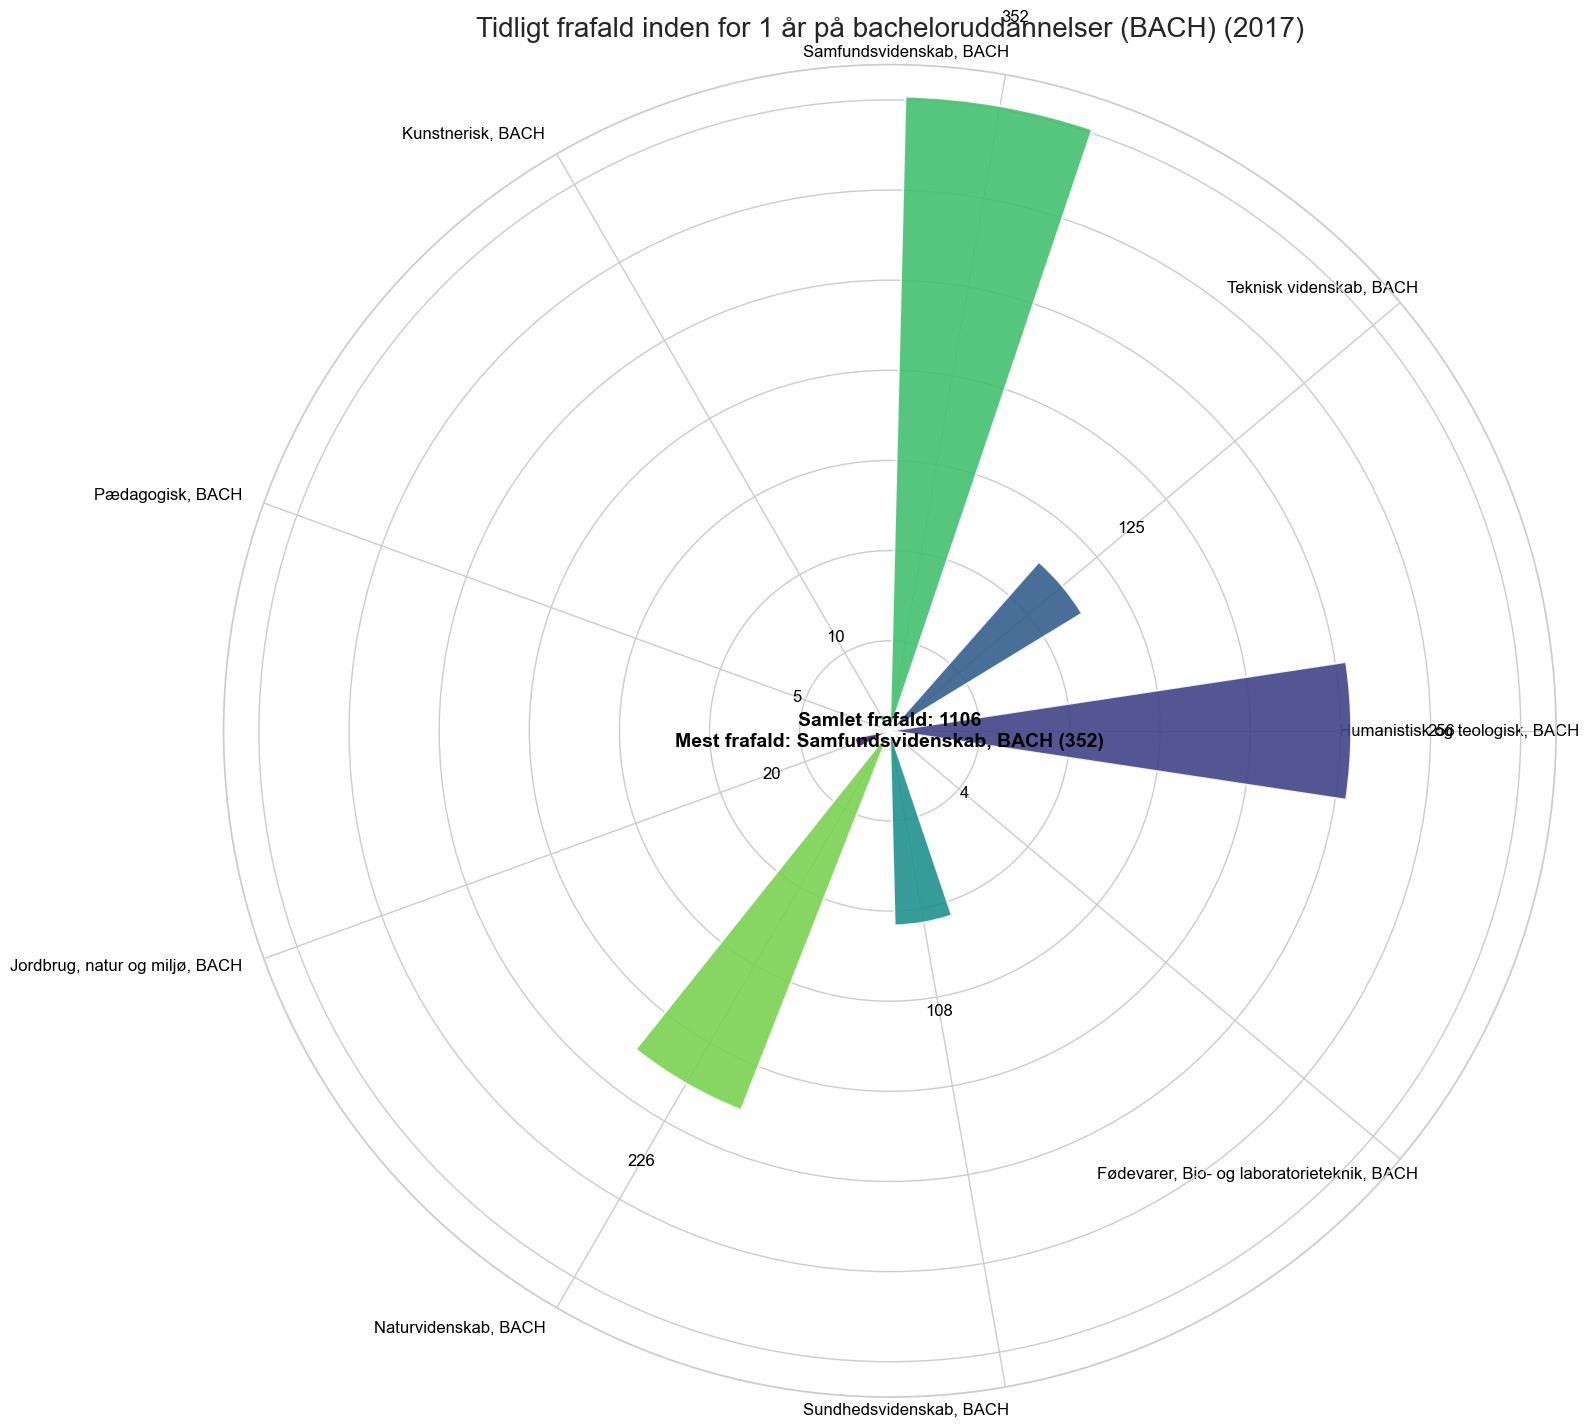

                                   Uddannelse  Frafald
0              Jordbrug, natur og miljø, BACH       20
1              Humanistisk og teologisk, BACH      256
2                     Teknisk videnskab, BACH      125
3                            Pædagogisk, BACH        5
4                     Sundhedsvidenskab, BACH      108
5                           Kunstnerisk, BACH       10
6                     Samfundsvidenskab, BACH      352
7                        Naturvidenskab, BACH      226
8  Fødevarer, Bio- og laboratorieteknik, BACH        4


In [10]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["5"]},  # "5" = Tidligt afbrudt inden for 1 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": [
            "H606020", "H606025", "H606030", "H606035", "H606039",
            "H606059", "H606075", "H606080", "H606090"
        ]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Send API-anmodningen
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']
udannelser = [
    "Pædagogisk, BACH",
    "Humanistisk og teologisk, BACH",
    "Kunstnerisk, BACH",
    "Naturvidenskab, BACH",
    "Samfundsvidenskab, BACH",
    "Teknisk videnskab, BACH",
    "Fødevarer, Bio- og laboratorieteknik, BACH",
    "Jordbrug, natur og miljø, BACH",
    "Sundhedsvidenskab, BACH"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelse": udannelser,
    "Frafald": values
})

# Juster data for at undgå falske høje værdier
df['Frafald'] = df['Frafald'].apply(lambda x: x if x > 0 else 0)

# Tilføj tilfældig rækkefølge til dataene
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Lav en radial bar chart med 'viridis' farvepaletten
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw={'polar': True})
colors = sns.color_palette('viridis', len(df))

# Beregn tilfældige vinkler til hver søjle
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
random.shuffle(angles)

# Plot radial søjlediagram med ekstra stil
bars = ax.bar(angles, df['Frafald'], width=0.3, color=colors, edgecolor='white', linewidth=1.5, alpha=0.9)

# Tilføj uddannelsesnavne omkring den cirkulære akse
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(df['Uddannelse'], fontsize=12, color='black', rotation=45, ha='right')

# Tilføj tal på toppen af hver søjle og ekstra fakta i midten
for angle, bar, frafald in zip(angles, bars, df['Frafald']):
    ax.text(angle, bar.get_height() + 50, f'{int(frafald)}', ha='center', va='center', fontsize=12, color='black')

# Tilføj centrale fakta
total_frafald = df['Frafald'].sum()
max_frafald = df.loc[df['Frafald'].idxmax()]
center_text = f"Samlet frafald: {total_frafald}\nMest frafald: {max_frafald['Uddannelse']} ({max_frafald['Frafald']})"
ax.text(0, 0, center_text, ha='center', va='center', fontsize=14, color='black', fontweight='bold')

plt.title('Tidligt frafald inden for 1 år på bacheloruddannelser (BACH) (2017)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

print(df)


Data er hentet


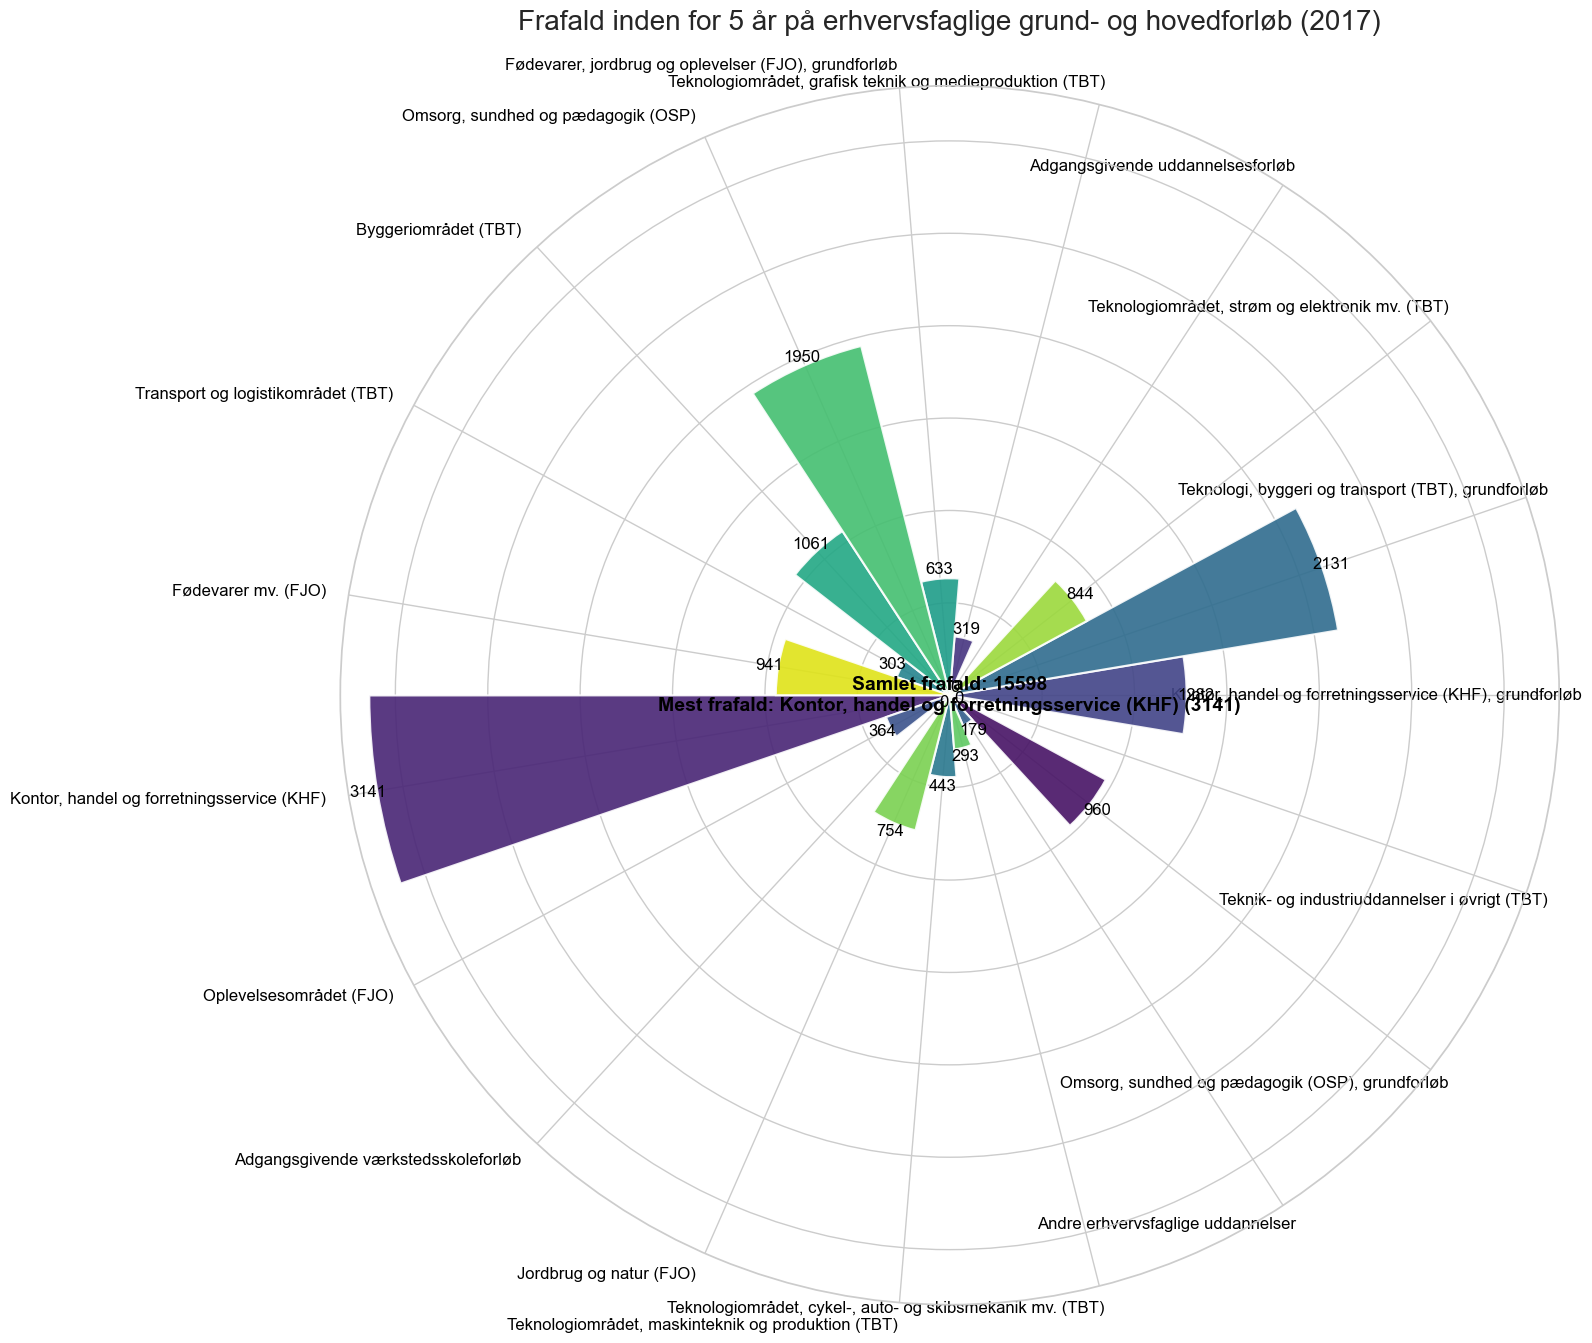

                                           Uddannelse  Frafald
0     Omsorg, sundhed og pædagogik (OSP), grundforløb      960
1          Kontor, handel og forretningsservice (KHF)     3141
2   Teknologiområdet, grafisk teknik og medieprodu...      319
3   Kontor, handel og forretningsservice (KHF), gr...     1282
4                             Oplevelsesområdet (FJO)      364
5                   Andre erhvervsfaglige uddannelser      179
6   Teknologi, byggeri og transport (TBT), grundfo...     2131
7   Teknologiområdet, maskinteknik og produktion (...      443
8                  Transport og logistikområdet (TBT)      303
9                    Adgangsgivende uddannelsesforløb        0
10  Fødevarer, jordbrug og oplevelser (FJO), grund...      633
11                               Byggeriområdet (TBT)     1061
12                Adgangsgivende værkstedsskoleforløb        0
13                 Omsorg, sundhed og pædagogik (OSP)     1950
14  Teknologiområdet, cykel-, auto- og skibsmekani...  

In [147]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "5" = Tidligt afbrudt inden for 1 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": [
            "H312910", "H312915", "H312920", "H312925",
             "H313010", "H313015", "H313020", "H313025",
            "H313030", "H313035", "H313040", "H313045", "H313050",
            "H313055", "H313060", "H313065", "H313090", "H3135",
            "H313530"
        ]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Send API-anmodningen
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']
udannelser = [
    "Omsorg, sundhed og pædagogik (OSP), grundforløb",
    "Kontor, handel og forretningsservice (KHF), grundforløb",
    "Fødevarer, jordbrug og oplevelser (FJO), grundforløb",
    "Teknologi, byggeri og transport (TBT), grundforløb",
    "Omsorg, sundhed og pædagogik (OSP)",
    "Kontor, handel og forretningsservice (KHF)",
    "Fødevarer mv. (FJO)",
    "Jordbrug og natur (FJO)",
    "Oplevelsesområdet (FJO)",
    "Byggeriområdet (TBT)",
    "Teknologiområdet, strøm og elektronik mv. (TBT)",
    "Teknologiområdet, grafisk teknik og medieproduktion (TBT)",
    "Teknologiområdet, cykel-, auto- og skibsmekanik mv. (TBT)",
    "Teknologiområdet, maskinteknik og produktion (TBT)",
    "Teknik- og industriuddannelser i øvrigt (TBT)",
    "Transport og logistikområdet (TBT)",
    "Andre erhvervsfaglige uddannelser",
    "Adgangsgivende uddannelsesforløb",
    "Adgangsgivende værkstedsskoleforløb"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelse": udannelser,
    "Frafald": values
})

# Juster data for at undgå falske høje værdier
df['Frafald'] = df['Frafald'].apply(lambda x: x if x > 0 else 0)

# Tilføj tilfældig rækkefølge til dataene
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Lav en radial bar chart med 'viridis' farvepaletten
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw={'polar': True})
colors = sns.color_palette('viridis', len(df))

# Beregn tilfældige vinkler til hver søjle
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
random.shuffle(angles)

# Plot radial søjlediagram med ekstra stil
bars = ax.bar(angles, df['Frafald'], width=0.33, color=colors, edgecolor='white', linewidth=1.5, alpha=0.9)

# Tilføj uddannelsesnavne omkring den cirkulære akse
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(df['Uddannelse'], fontsize=12, color='black', rotation=45, ha='right')

# Tilføj tal på toppen af hver søjle og ekstra fakta i midten
for angle, bar, frafald in zip(angles, bars, df['Frafald']):
    ax.text(angle, bar.get_height() + 50, f'{int(frafald)}', ha='center', va='center', fontsize=12, color='black')

# Tilføj centrale fakta
total_frafald = df['Frafald'].sum()
max_frafald = df.loc[df['Frafald'].idxmax()]
center_text = f"Samlet frafald: {total_frafald}\nMest frafald: {max_frafald['Uddannelse']} ({max_frafald['Frafald']})"
ax.text(0, 0, center_text, ha='center', va='center', fontsize=14, color='black', fontweight='bold')

plt.title('Frafald inden for 5 år på erhvervsfaglige grund- og hovedforløb (2017)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

print(df)


Data er hentet


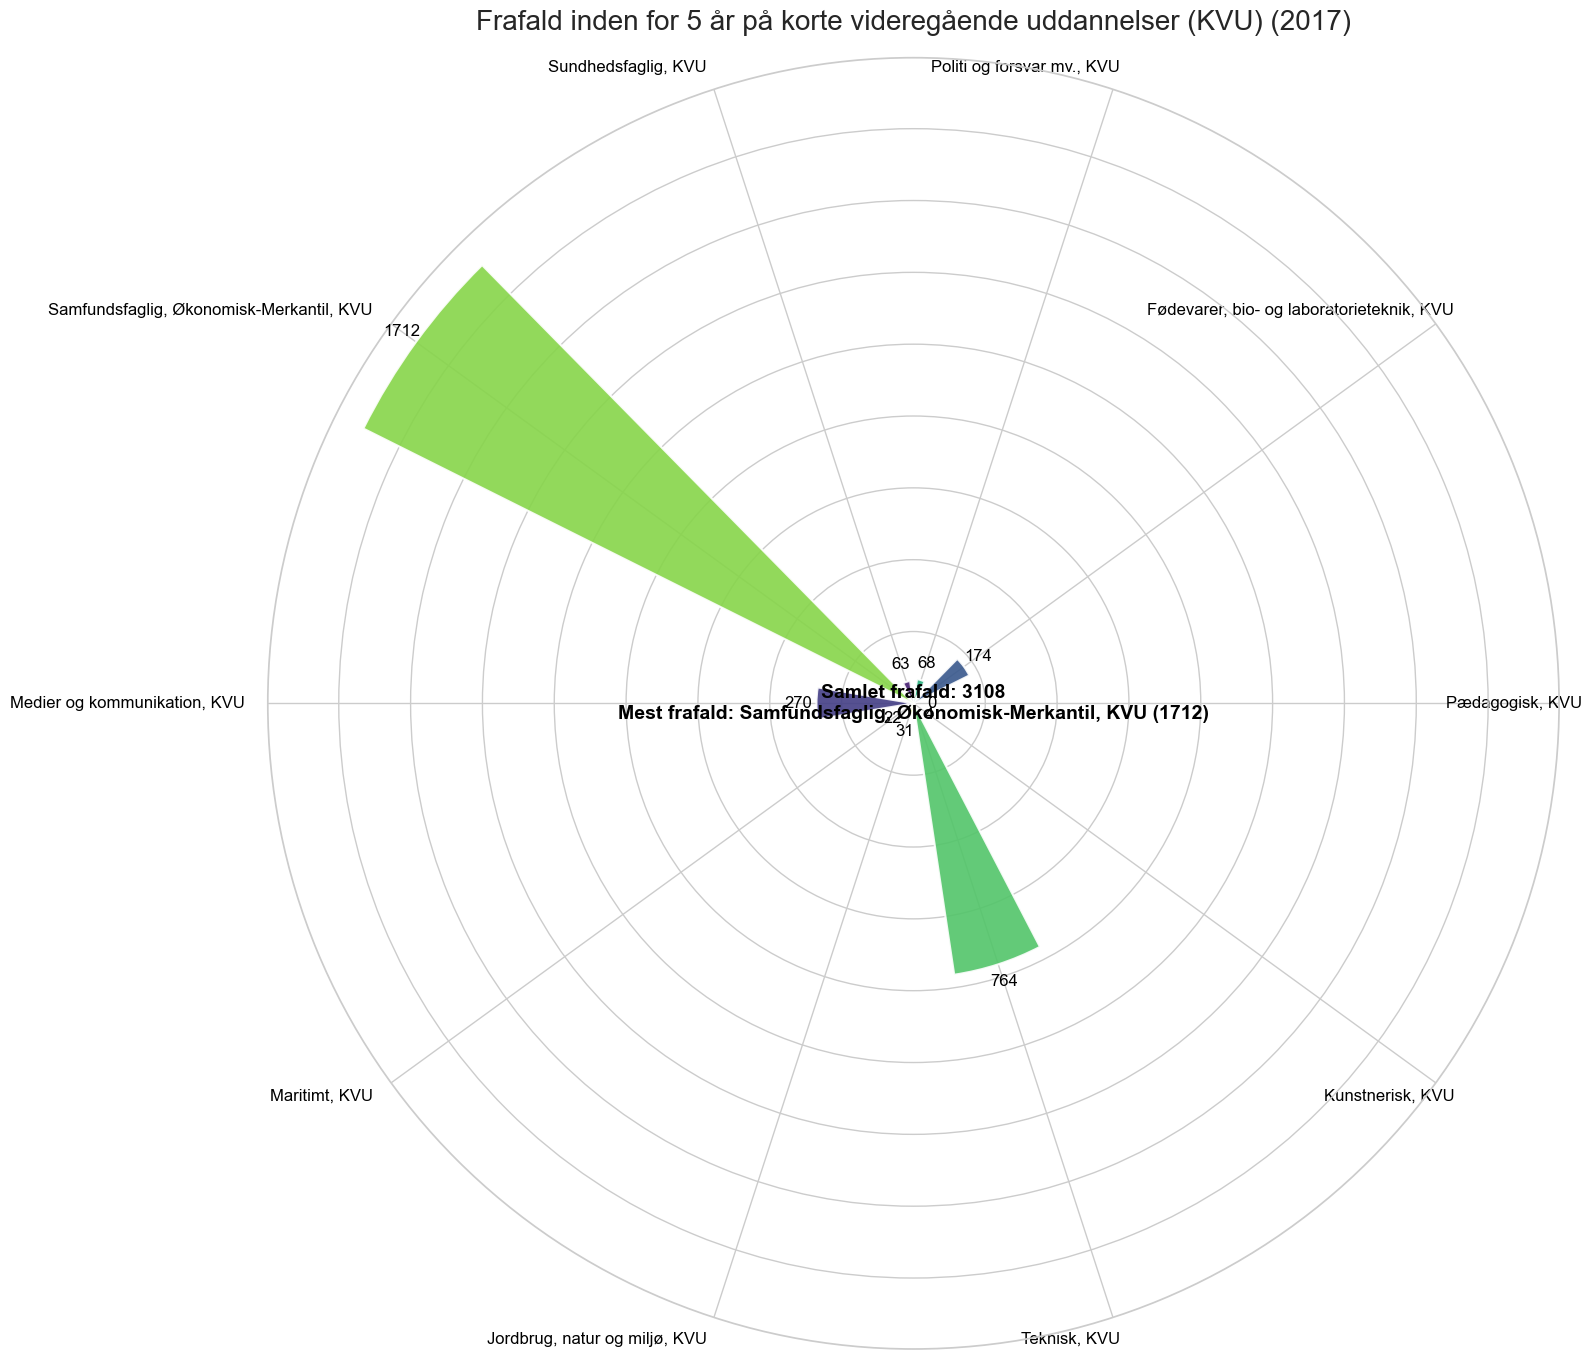

                                  Uddannelse  Frafald
0                        Sundhedsfaglig, KVU       63
1               Medier og kommunikation, KVU      270
2  Fødevarer, bio- og laboratorieteknik, KVU      174
3                            Pædagogisk, KVU        0
4                              Maritimt, KVU       22
5                           Kunstnerisk, KVU        4
6                 Politi og forsvar mv., KVU       68
7                               Teknisk, KVU      764
8   Samfundsfaglig, Økonomisk-Merkantil, KVU     1712
9              Jordbrug, natur og miljø, KVU       31


In [145]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "5" = Tidligt afbrudt inden for 1 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": [
            "H404020", "H404024", "H404030", "H404038", "H404058",
            "H404075", "H404080", "H404085", "H404089", "H404095"
        ]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Send API-anmodningen
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']
udannelser = [
    "Pædagogisk, KVU",
    "Medier og kommunikation, KVU",
    "Kunstnerisk, KVU",
    "Samfundsfaglig, Økonomisk-Merkantil, KVU",
    "Teknisk, KVU",
    "Fødevarer, bio- og laboratorieteknik, KVU",
    "Jordbrug, natur og miljø, KVU",
    "Maritimt, KVU",
    "Sundhedsfaglig, KVU",
    "Politi og forsvar mv., KVU"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelse": udannelser,
    "Frafald": values
})

# Juster data for at undgå falske høje værdier
df['Frafald'] = df['Frafald'].apply(lambda x: x if x > 0 else 0)

# Tilføj tilfældig rækkefølge til dataene
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Lav en radial bar chart med 'viridis' farvepaletten
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw={'polar': True})
colors = sns.color_palette('viridis', len(df))

# Beregn tilfældige vinkler til hver søjle
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
random.shuffle(angles)

# Plot radial søjlediagram med ekstra stil
bars = ax.bar(angles, df['Frafald'], width=0.33, color=colors, edgecolor='white', linewidth=1.5, alpha=0.9)

# Tilføj uddannelsesnavne omkring den cirkulære akse
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(df['Uddannelse'], fontsize=12, color='black', rotation=45, ha='right')

# Tilføj tal på toppen af hver søjle og ekstra fakta i midten
for angle, bar, frafald in zip(angles, bars, df['Frafald']):
    ax.text(angle, bar.get_height() + 50, f'{int(frafald)}', ha='center', va='center', fontsize=12, color='black')

# Tilføj centrale fakta
total_frafald = df['Frafald'].sum()
max_frafald = df.loc[df['Frafald'].idxmax()]
center_text = f"Samlet frafald: {total_frafald}\nMest frafald: {max_frafald['Uddannelse']} ({max_frafald['Frafald']})"
ax.text(0, 0, center_text, ha='center', va='center', fontsize=14, color='black', fontweight='bold')

plt.title('Frafald inden for 5 år på korte videregående uddannelser (KVU) (2017)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

print(df)


Data er hentet


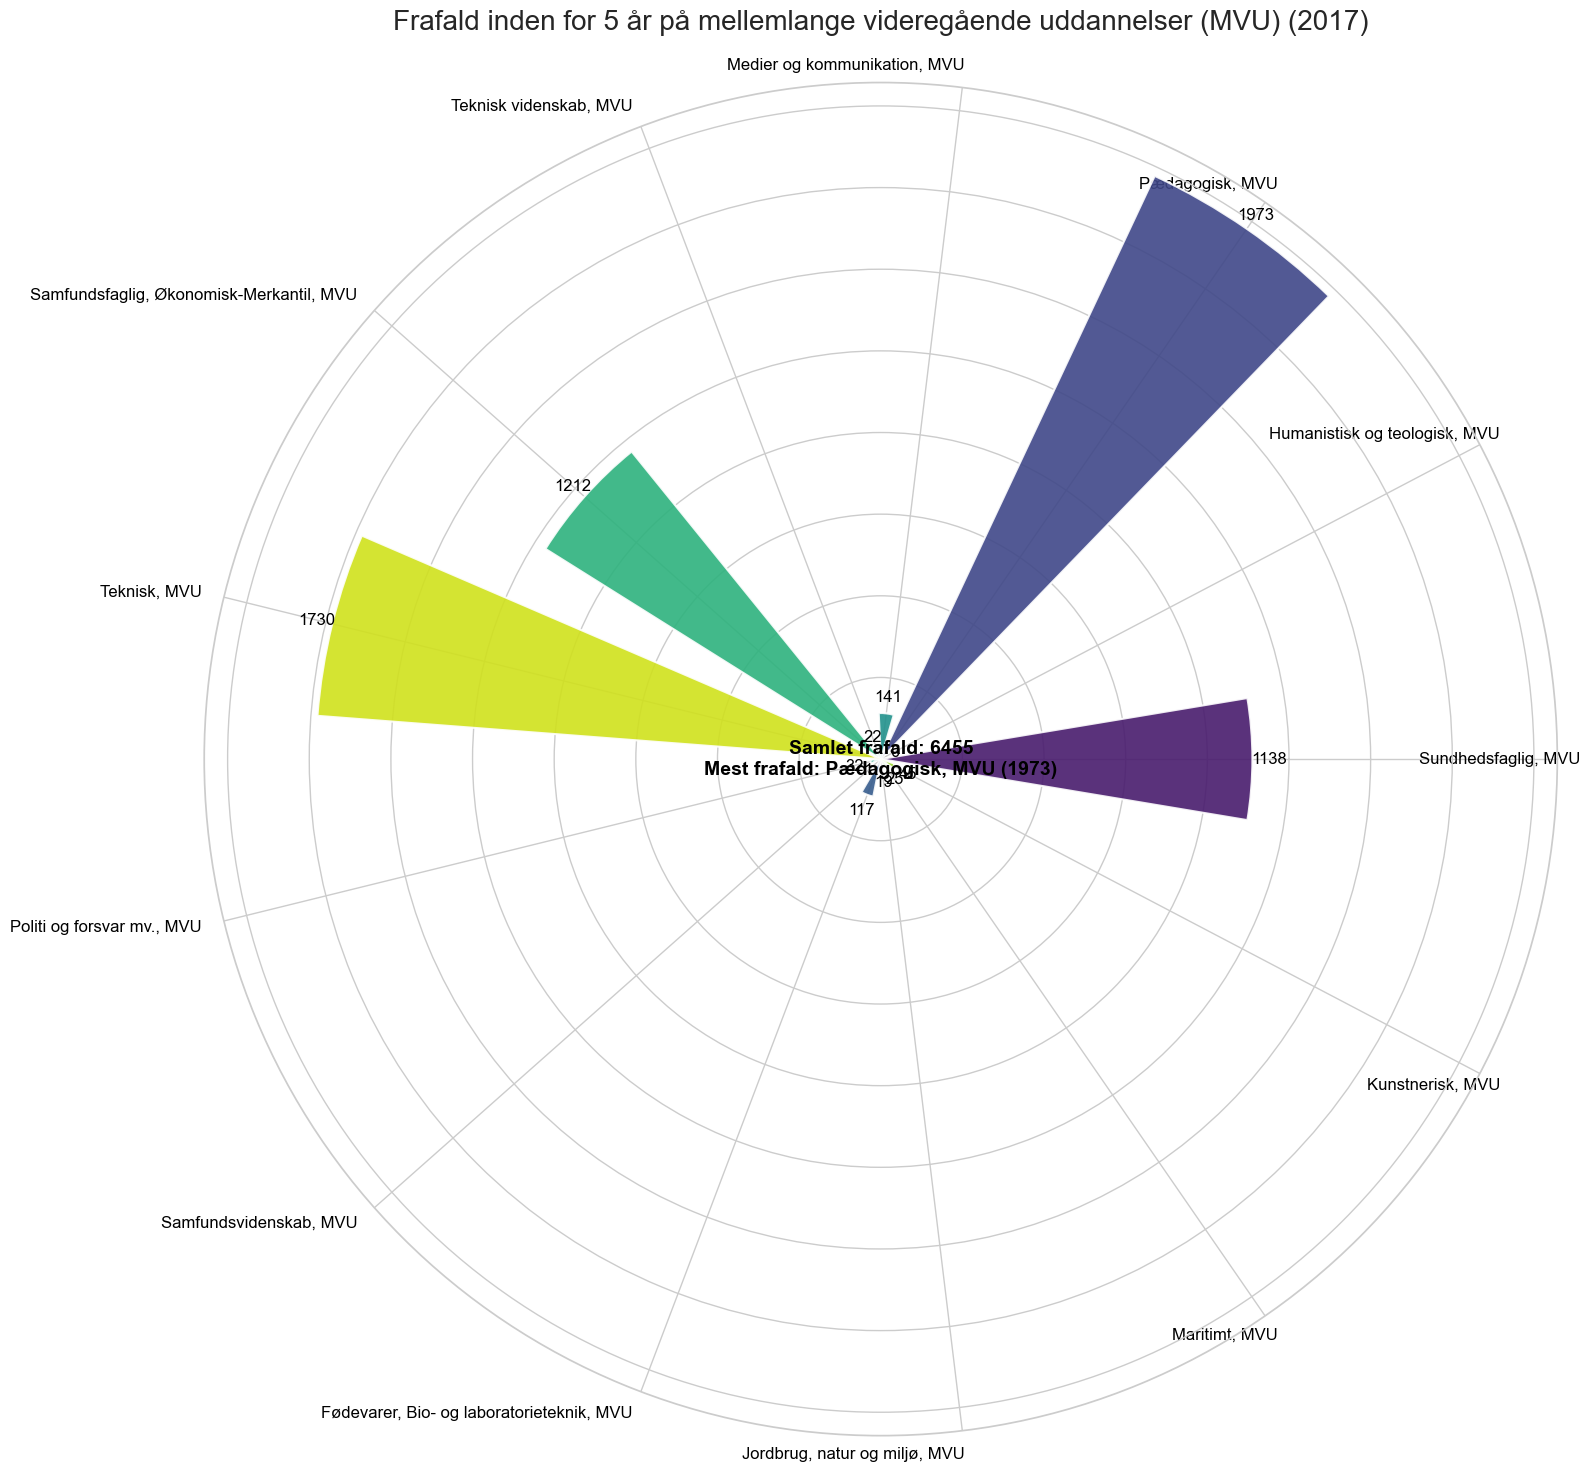

                                   Uddannelse  Frafald
0                         Sundhedsfaglig, MVU     1138
1               Jordbrug, natur og miljø, MVU       19
2                             Pædagogisk, MVU     1973
3   Fødevarer, Bio- og laboratorieteknik, MVU      117
4                      Samfundsvidenskab, MVU        1
5               Humanistisk og teologisk, MVU        0
6                Medier og kommunikation, MVU      141
7                  Politi og forsvar mv., MVU       32
8    Samfundsfaglig, Økonomisk-Merkantil, MVU     1212
9                      Teknisk videnskab, MVU       22
10                              Maritimt, MVU       25
11                           Kunstnerisk, MVU       45
12                               Teknisk, MVU     1730


In [144]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "5" = Tidligt afbrudt inden for 1 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": [
            "H505020", "H505024", "H505025", "H505030", "H505038",
            "H505039", "H505058", "H505059", "H505075", "H505080",
            "H505085", "H505089", "H505095"
        ]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Send API-anmodningen
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']
udannelser = [
    "Pædagogisk, MVU",
    "Medier og kommunikation, MVU",
    "Humanistisk og teologisk, MVU",
    "Kunstnerisk, MVU",
    "Samfundsfaglig, Økonomisk-Merkantil, MVU",
    "Samfundsvidenskab, MVU",
    "Teknisk, MVU",
    "Teknisk videnskab, MVU",
    "Fødevarer, Bio- og laboratorieteknik, MVU",
    "Jordbrug, natur og miljø, MVU",
    "Maritimt, MVU",
    "Sundhedsfaglig, MVU",
    "Politi og forsvar mv., MVU"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelse": udannelser,
    "Frafald": values
})

# Juster data for at undgå falske høje værdier
df['Frafald'] = df['Frafald'].apply(lambda x: x if x > 0 else 0)

# Tilføj tilfældig rækkefølge til dataene
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Lav en radial bar chart med 'viridis' farvepaletten
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw={'polar': True})
colors = sns.color_palette('viridis', len(df))

# Beregn tilfældige vinkler til hver søjle
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
random.shuffle(angles)

# Plot radial søjlediagram med ekstra stil
bars = ax.bar(angles, df['Frafald'], width=0.33, color=colors, edgecolor='white', linewidth=1.5, alpha=0.9)

# Tilføj uddannelsesnavne omkring den cirkulære akse
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(df['Uddannelse'], fontsize=12, color='black', rotation=45, ha='right')

# Tilføj tal på toppen af hver søjle og ekstra fakta i midten
for angle, bar, frafald in zip(angles, bars, df['Frafald']):
    ax.text(angle, bar.get_height() + 50, f'{int(frafald)}', ha='center', va='center', fontsize=12, color='black')

# Tilføj centrale fakta
total_frafald = df['Frafald'].sum()
max_frafald = df.loc[df['Frafald'].idxmax()]
center_text = f"Samlet frafald: {total_frafald}\nMest frafald: {max_frafald['Uddannelse']} ({max_frafald['Frafald']})"
ax.text(0, 0, center_text, ha='center', va='center', fontsize=14, color='black', fontweight='bold')

plt.title('Frafald inden for 5 år på mellemlange videregående uddannelser (MVU) (2017)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

print(df)


Data er hentet


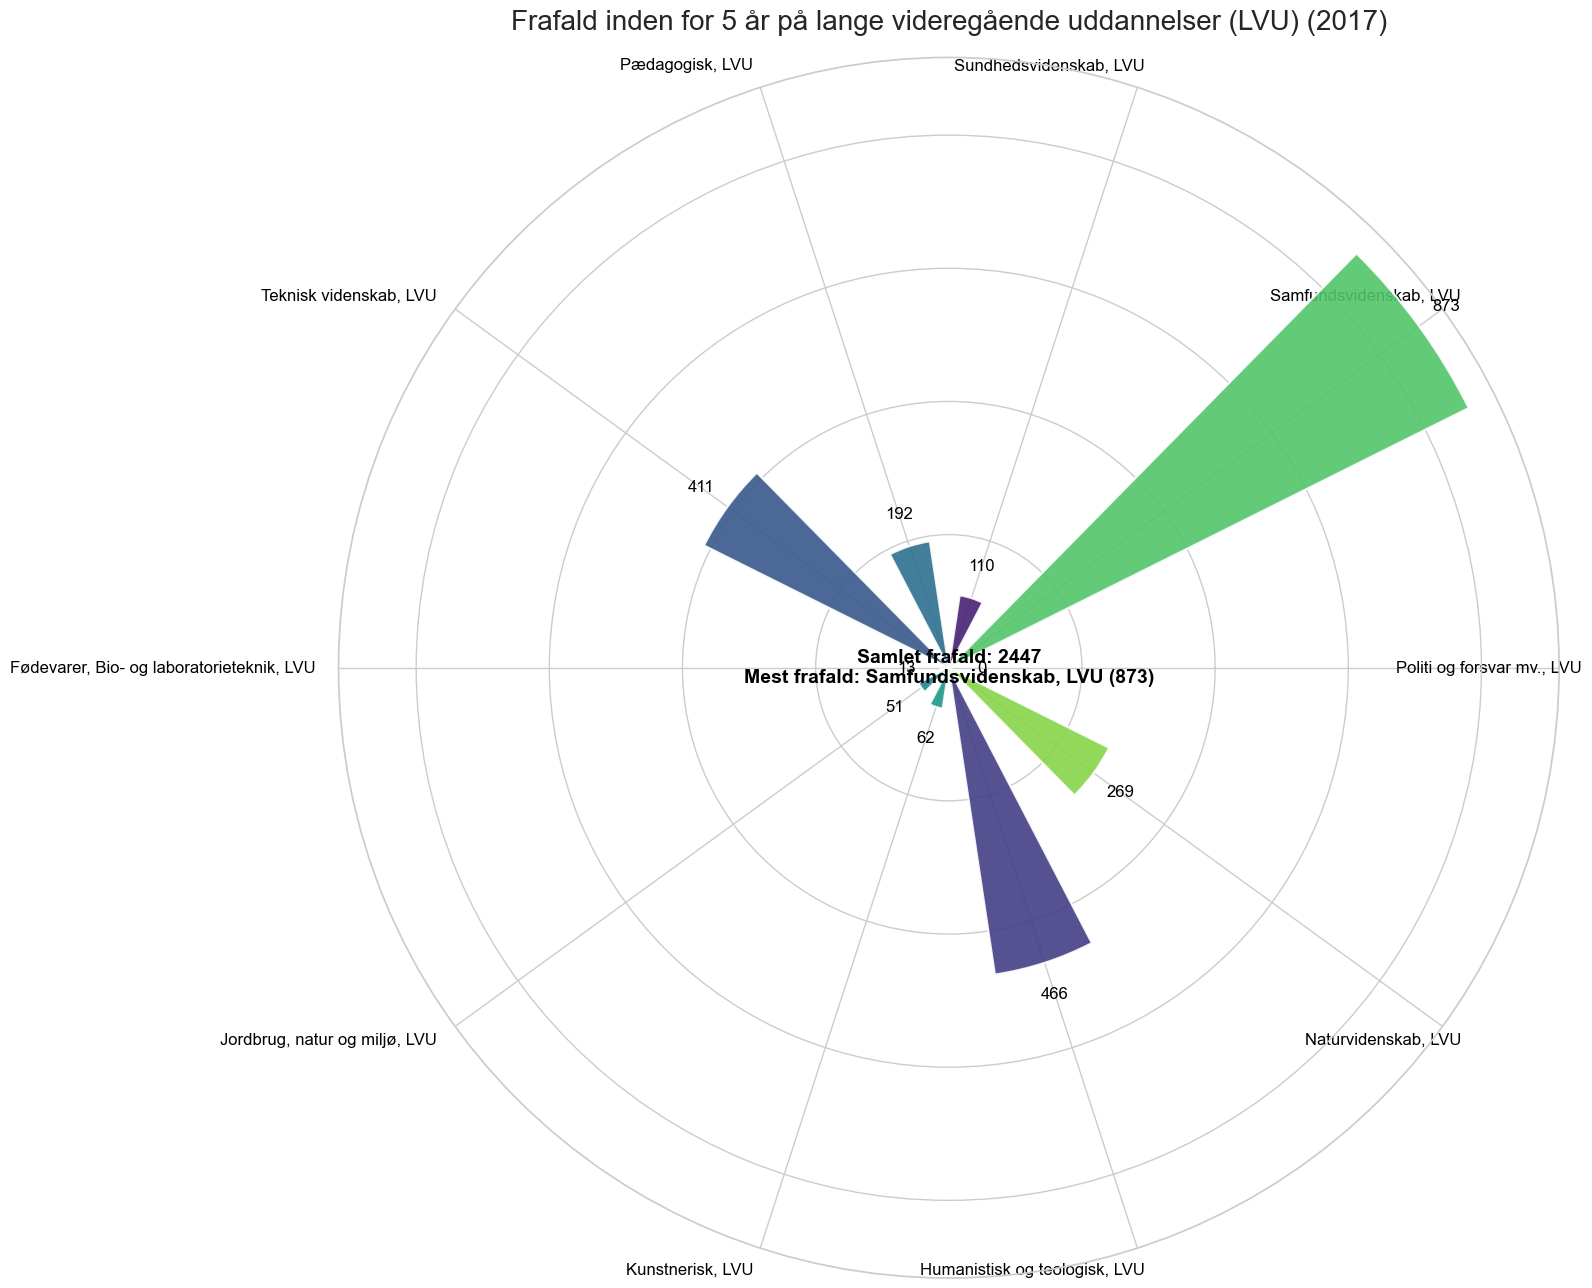

                                  Uddannelse  Frafald
0                     Sundhedsvidenskab, LVU      110
1              Humanistisk og teologisk, LVU      466
2                     Teknisk videnskab, LVU      411
3                            Pædagogisk, LVU      192
4              Jordbrug, natur og miljø, LVU       51
5                           Kunstnerisk, LVU       62
6                 Politi og forsvar mv., LVU        0
7                     Samfundsvidenskab, LVU      873
8                        Naturvidenskab, LVU      269
9  Fødevarer, Bio- og laboratorieteknik, LVU       13


In [143]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# API
api = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "5" = Tidligt afbrudt inden for 1 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": [
            "H707020", "H707025", "H707030", "H707035", "H707039",
            "H707059", "H707075", "H707080", "H707090", "H707095"
        ]},
        {"code": "Tid", "values": ["2017"]}  # Kun 2017
    ]
}

# Send API-anmodningen
response = requests.post(url, json=api)

# Tjek om data blev hentet korrekt
if response.status_code == 200:
    data = response.json()
    print("Data er hentet")
else:
    print(f"Fejl: {response.status_code}")
    exit()

# Konverter data til DataFrame
values = data['dataset']['value']
udannelser = [
    "Pædagogisk, LVU",
    "Humanistisk og teologisk, LVU",
    "Kunstnerisk, LVU",
    "Naturvidenskab, LVU",
    "Samfundsvidenskab, LVU",
    "Teknisk videnskab, LVU",
    "Fødevarer, Bio- og laboratorieteknik, LVU",
    "Jordbrug, natur og miljø, LVU",
    "Sundhedsvidenskab, LVU",
    "Politi og forsvar mv., LVU"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelse": udannelser,
    "Frafald": values
})

# Juster data for at undgå falske høje værdier
df['Frafald'] = df['Frafald'].apply(lambda x: x if x > 0 else 0)

# Tilføj tilfældig rækkefølge til dataene
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Lav en radial bar chart med 'viridis' farvepaletten
fig, ax = plt.subplots(figsize=(16, 16), subplot_kw={'polar': True})
colors = sns.color_palette('viridis', len(df))

# Beregn tilfældige vinkler til hver søjle
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
random.shuffle(angles)

# Plot radial søjlediagram med ekstra stil
bars = ax.bar(angles, df['Frafald'], width=0.33, color=colors, edgecolor='white', linewidth=1.5, alpha=0.9)

# Tilføj uddannelsesnavne omkring den cirkulære akse
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(df['Uddannelse'], fontsize=12, color='black', rotation=45, ha='right')

# Tilføj tal på toppen af hver søjle og ekstra fakta i midten
for angle, bar, frafald in zip(angles, bars, df['Frafald']):
    ax.text(angle, bar.get_height() + 50, f'{int(frafald)}', ha='center', va='center', fontsize=12, color='black')

# Tilføj centrale fakta
total_frafald = df['Frafald'].sum()
max_frafald = df.loc[df['Frafald'].idxmax()]
center_text = f"Samlet frafald: {total_frafald}\nMest frafald: {max_frafald['Uddannelse']} ({max_frafald['Frafald']})"
ax.text(0, 0, center_text, ha='center', va='center', fontsize=14, color='black', fontweight='bold')

plt.title('Frafald inden for 5 år på lange videregående uddannelser (LVU) (2017)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

print(df)


Lav en graf over antal startede og som droppede ud i enten søjle eller cirkel

Data er hentet korrekt


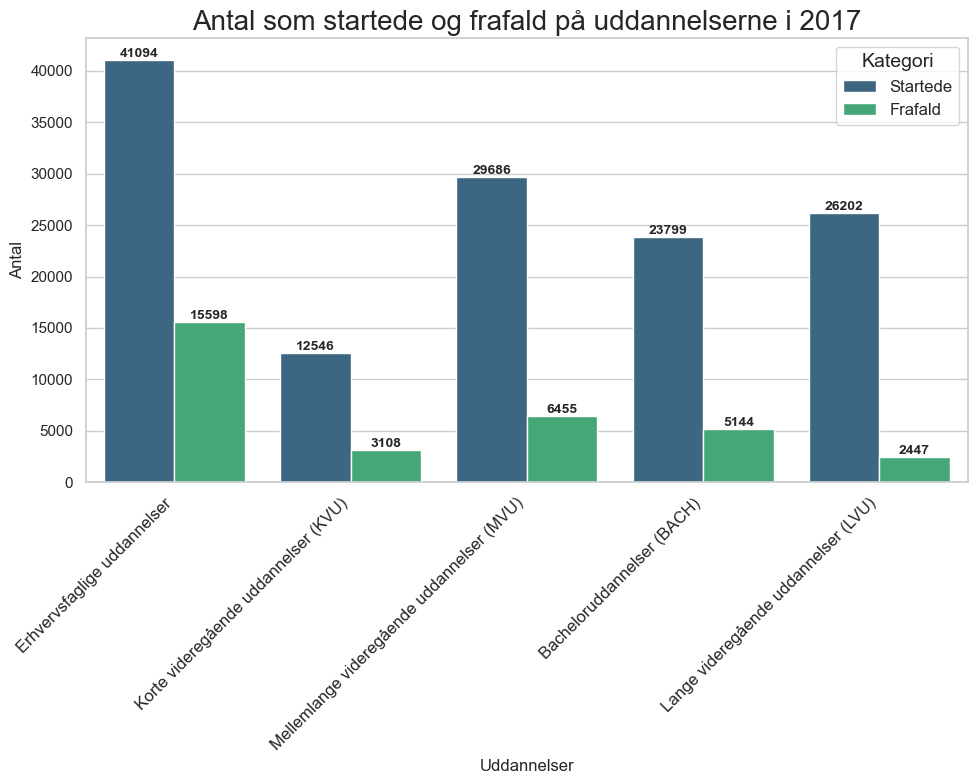

                                  Uddannelser  Startede  Frafald
0                 Erhvervsfaglige uddannelser     41094    15598
1        Korte videregående uddannelser (KVU)     12546     3108
2  Mellemlange videregående uddannelser (MVU)     29686     6455
3                  Bacheloruddannelser (BACH)     23799     5144
4        Lange videregående uddannelser (LVU)     26202     2447


In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# Opdaterede uddannelsestyper
uddannelseskoder = [
    "H31",    # Erhvervsfaglige uddannelser
    "H40",    # Korte videregående uddannelser, KVU
    "H50",    # Mellemlange videregående uddannelser, MVU
    "H60",    # Bacheloruddannelser, BACH
    "H70"     # Lange videregående uddannelser, LVU
]

# API-anmodning for antal startede i 2017
api_startede = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["TOT"]},  # "TOT" = I alt
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# API-anmodning for frafald inden for 5 år
api_frafald = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "7" = Frafald i gruppen inden for 5 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# Sender API-anmodninger
response_startede = requests.post(url, json=api_startede)
response_frafald = requests.post(url, json=api_frafald)

# Tjek om data blev hentet korrekt
if response_startede.status_code == 200 and response_frafald.status_code == 200:
    data_startede = response_startede.json()
    data_frafald = response_frafald.json()
    print("Data er hentet korrekt")
else:
    print(f"Fejl ved startede: {response_startede.status_code}")
    print(f"Fejl ved frafald: {response_frafald.status_code}")
    exit()

# Konverter data til DataFrame
values_startede = data_startede['dataset']['value']
values_frafald = data_frafald['dataset']['value']

uddannelser = [
    "Erhvervsfaglige uddannelser",
    "Korte videregående uddannelser (KVU)",
    "Mellemlange videregående uddannelser (MVU)",
    "Bacheloruddannelser (BACH)",
    "Lange videregående uddannelser (LVU)"
]

# Opret DataFrame med korrekte data
df = pd.DataFrame({
    "Uddannelser": uddannelser,
    "Startede": values_startede,
    "Frafald": values_frafald
})

# Visualiser data som grupperede søjlediagrammer
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
ax = sns.barplot(data=df.melt(id_vars='Uddannelser', var_name='Kategori', value_name='Antal'),
                 x='Uddannelser', y='Antal', hue='Kategori', palette='viridis', edgecolor='white', linewidth=1)

# Ændre skrifttypen og størrelsen
plt.rcParams['font.family'] = 'Arial'
plt.ylabel('Antal', fontsize=12)
plt.title('Antal som startede og frafald på uddannelserne i 2017', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Kategori', fontsize=12, title_fontsize=14, loc='upper right')

# Tilføj værdier på toppen af søjlerne
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Udskriv DataFrame for at tjekke data
print(df)



Data er hentet korrekt


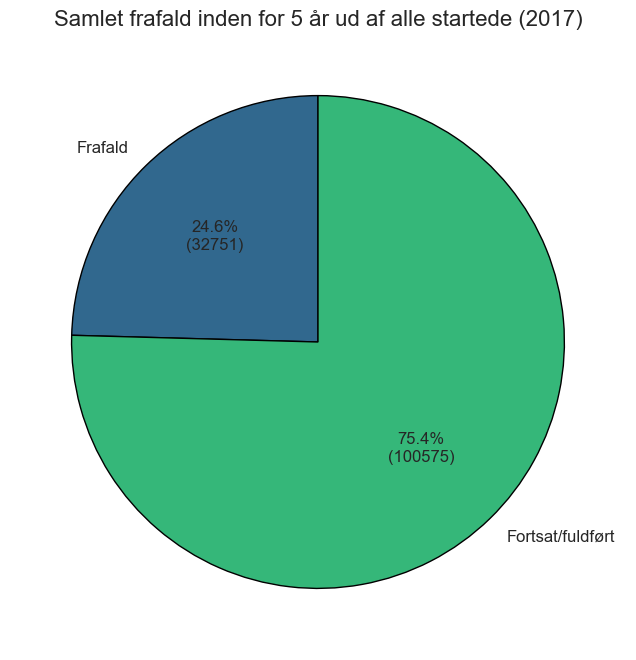

In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# Opdaterede uddannelsestyper
uddannelseskoder = [
    "H31",    # Erhvervsfaglige uddannelser
    "H40",    # Korte videregående uddannelser, KVU
    "H50",    # Mellemlange videregående uddannelser, MVU
    "H60",    # Bacheloruddannelser, BACH
    "H70"     # Lange videregående uddannelser, LVU
]

# API-anmodning for antal startede i 2017
api_startede = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["TOT"]},  # "TOT" = I alt
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# API-anmodning for frafald inden for 5 år
api_frafald = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "7" = Frafald i gruppen inden for 5 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# Sender API-anmodninger
response_startede = requests.post(url, json=api_startede)
response_frafald = requests.post(url, json=api_frafald)

# Tjek om data blev hentet korrekt
if response_startede.status_code == 200 and response_frafald.status_code == 200:
    data_startede = response_startede.json()
    data_frafald = response_frafald.json()
    print("Data er hentet korrekt")
else:
    print(f"Fejl ved startede: {response_startede.status_code}")
    print(f"Fejl ved frafald: {response_frafald.status_code}")
    exit()

# Konverter data til DataFrame
values_startede = data_startede['dataset']['value']
values_frafald = data_frafald['dataset']['value']

total_startede = sum(values_startede)
total_frafald = sum(values_frafald)
resterende = total_startede - total_frafald

# Opret DataFrame til cirkeldiagram
data_pie = pd.DataFrame({
    "Kategori": ["Frafald", "Fortsat/fuldført"],
    "Antal": [total_frafald, resterende]
})

# Visualiser data som cirkeldiagram
plt.figure(figsize=(8, 8))
colors = sns.color_palette("viridis", 2)  # Brug viridis paletten
plt.pie(data_pie["Antal"], labels=data_pie["Kategori"],
        autopct=lambda p: f'{p:.1f}%\n({int(p * sum(data_pie["Antal"]) / 100)})',
        startangle=90, colors=colors,
        textprops={"fontsize": 12}, wedgeprops={"edgecolor": "black", "linewidth": 1})
plt.title("Samlet frafald inden for 5 år ud af alle startede (2017)", fontsize=16)
plt.show()

Data er hentet korrekt


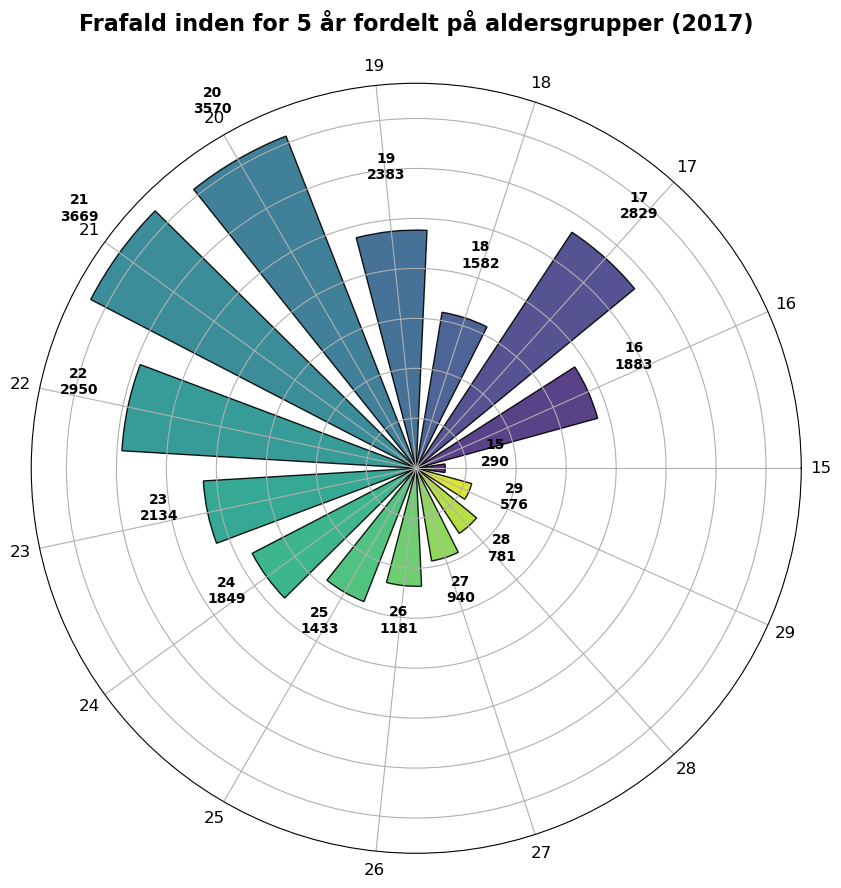

In [3]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# Opdaterede uddannelsestyper
uddannelseskoder = [
    "H31", "H40", "H50", "H60", "H70"  # Uddannelsestyper
]

# Aldersgrupper fra 15 til 29
aldersgrupper = [str(i) for i in range(15, 30)]

# API-anmodning for frafald inden for 5 år fordelt på alder
api_frafald = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "7" = Frafald i gruppen inden for 5 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": uddannelseskoder},
        {"code": "STARTALD", "values": aldersgrupper},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# Sender API-anmodning
response_frafald = requests.post(url, json=api_frafald)

# Tjek om data blev hentet korrekt
if response_frafald.status_code == 200:
    data_frafald = response_frafald.json()
    print("Data er hentet korrekt")
else:
    print(f"Fejl ved frafald: {response_frafald.status_code}")
    print(f"Svar fra serveren: {response_frafald.text}")
    exit()

# Konverter data til DataFrame
values_frafald = data_frafald['dataset']['value']

# Tjek om længden af værdierne matcher forventet antal poster
total_expected = len(aldersgrupper) * len(uddannelseskoder)
if len(values_frafald) != total_expected:
    print(f"Advarsel: Forventede {total_expected} værdier, men fik {len(values_frafald)}.")
    exit()

# Opret DataFrame til polar diagram
age_repeated = aldersgrupper * len(uddannelseskoder)
education_repeated = [edu for edu in uddannelseskoder for _ in aldersgrupper]

data_polar = pd.DataFrame({
    "Alder": age_repeated,
    "Uddannelse": education_repeated,
    "Frafald": values_frafald
})

# Sammenlæg data pr. aldersgruppe
df_aggregated = data_polar.groupby("Alder")["Frafald"].sum().reset_index()

# Visualiser data som et polar diagram
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
angles = np.linspace(0, 2 * np.pi, len(df_aggregated), endpoint=False)
colors = sns.color_palette("viridis", len(df_aggregated))

bars = ax.bar(angles, df_aggregated["Frafald"], width=0.3, color=colors, edgecolor='black', alpha=0.9)

# Tilføj labels
for bar, alder, frafald in zip(bars, df_aggregated["Alder"], df_aggregated["Frafald"]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{alder}\n{int(frafald)}',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Fjern y-aksens markeringer
ax.set_yticklabels([])
ax.set_xticks(angles)
ax.set_xticklabels(df_aggregated["Alder"], fontsize=12, color='black')
ax.set_title("Frafald inden for 5 år fordelt på aldersgrupper (2017)", fontsize=16, fontweight='bold', pad=20)
plt.show()


Data er hentet korrekt


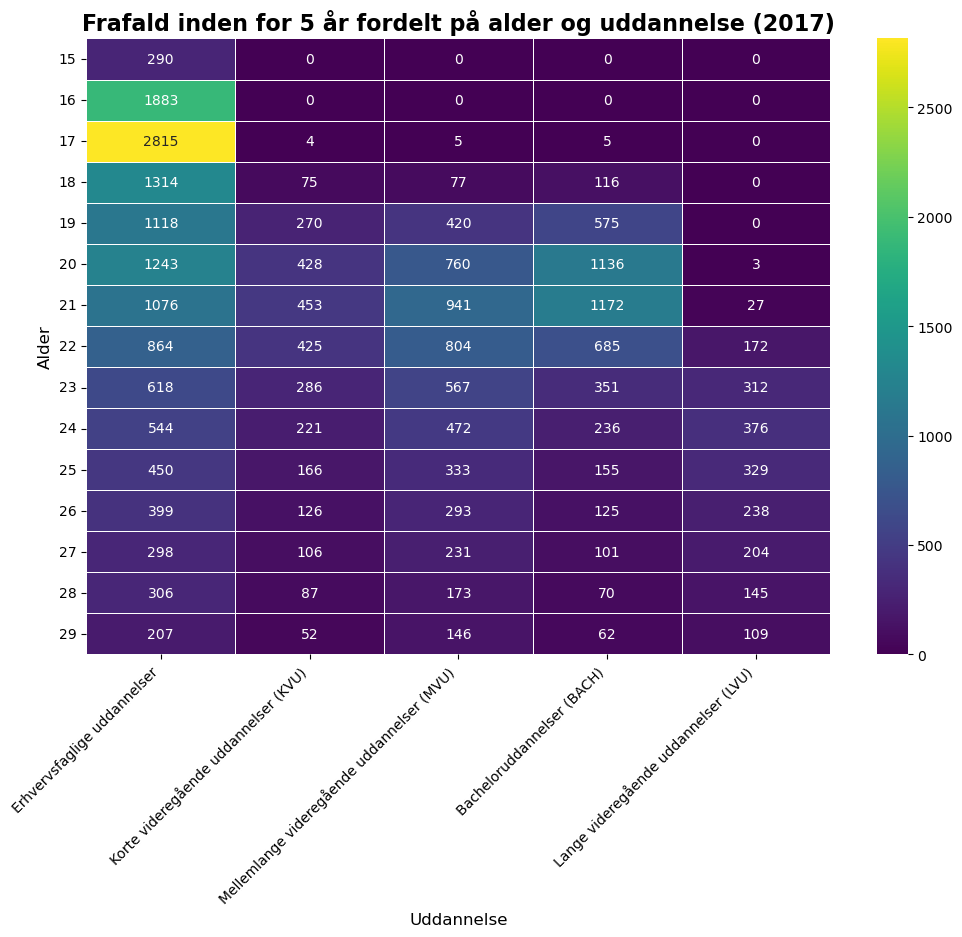

In [6]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# URL til Danmarks Statistiks API for uddannelsesdata
url = "https://api.statbank.dk/v1/data/GENMF10/JSONSTAT"

# Opdaterede uddannelsestyper sorteret efter livslang læring
uddannelseskoder = {
    "H31": "Erhvervsfaglige uddannelser",
    "H40": "Korte videregående uddannelser (KVU)",
    "H50": "Mellemlange videregående uddannelser (MVU)",
    "H60": "Bacheloruddannelser (BACH)",
    "H70": "Lange videregående uddannelser (LVU)"
}

# Aldersgrupper fra 15 til 29
aldersgrupper = [str(i) for i in range(15, 30)]

# API-anmodning for frafald inden for 5 år fordelt på alder
api_frafald = {
    "table": "GENMF10",
    "format": "JSONSTAT",
    "variables": [
        {"code": "STAT", "values": ["7"]},  # "7" = Frafald i gruppen inden for 5 år
        {"code": "KØN", "values": ["10"]},  # "10" = Køn i alt
        {"code": "STARTUD", "values": list(uddannelseskoder.keys())},
        {"code": "STARTALD", "values": aldersgrupper},
        {"code": "Tid", "values": ["2017"]}
    ]
}

# Sender API-anmodning
response_frafald = requests.post(url, json=api_frafald)

# Tjek om data blev hentet korrekt
if response_frafald.status_code == 200:
    data_frafald = response_frafald.json()
    print("Data er hentet korrekt")
else:
    print(f"Fejl ved frafald: {response_frafald.status_code}")
    print(f"Svar fra serveren: {response_frafald.text}")
    exit()

# Konverter data til DataFrame
values_frafald = data_frafald['dataset']['value']

# Tjek om længden af værdierne matcher forventet antal poster
total_expected = len(aldersgrupper) * len(uddannelseskoder)
if len(values_frafald) != total_expected:
    print(f"Advarsel: Forventede {total_expected} værdier, men fik {len(values_frafald)}.")
    exit()

# Opret DataFrame til heatmap
age_repeated = aldersgrupper * len(uddannelseskoder)
education_repeated = [uddannelseskoder[edu] for edu in ["H31", "H40", "H50", "H60", "H70"] for _ in aldersgrupper]

data_heatmap = pd.DataFrame({
    "Alder": age_repeated,
    "Uddannelse": education_repeated,
    "Frafald": values_frafald
})

# Pivot data til heatmap format
heatmap_data = data_heatmap.pivot(index="Alder", columns="Uddannelse", values="Frafald")
heatmap_data = heatmap_data[["Erhvervsfaglige uddannelser", "Korte videregående uddannelser (KVU)", "Mellemlange videregående uddannelser (MVU)", "Bacheloruddannelser (BACH)", "Lange videregående uddannelser (LVU)"]]

# Visualiser data som et heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".0f", linewidths=0.5, cbar=True)
plt.title("Frafald inden for 5 år fordelt på alder og uddannelse (2017)", fontsize=16, fontweight="bold")
plt.xlabel("Uddannelse", fontsize=12)
plt.ylabel("Alder", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()